# **PROJECT**    - Sales Prediction using Machine Learning Algorithms on Rossmann store.



#***Dataset***

### Rossmann Dataset Overview

Two datasets:
1. **Rossmann Stores Data.csv**: Historical sales data.
2. **Store.csv**: Store-specific info.

**Key Fields:**
- **Id**: (Store, Date) pair.
- **Store**: Unique store ID.
- **Sales**: Daily turnover (target).
- **Customers**: Daily customer count.
- **Open**: Store status (1 = open, 0 = closed).
- **StateHoliday**: State holiday: `a` = public, `b` = Easter, `c` = Christmas, `0` = none.
- **SchoolHoliday**: School closure effect.
- **StoreType**: Store model (`a`, `b`, `c`, `d`).
- **Assortment**: Assortment type (`a` = basic, `b` = extra, `c` = extended).
- **CompetitionDistance**: Distance to nearest competitor.
- **CompetitionOpenSince**: Competitor opening month/year.
- **Promo**: Store promotion (1 = yes, 0 = no).
- **Promo2**: Continuous promotion (1 = yes, 0 = no).
- **PromoInterval**: Months when Promo2 is active (e.g., "Feb, May, Aug, Nov").


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [ ]:
# Import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import ast
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import pickle

# to display all the graphs in the notebook
sns.set_style("whitegrid", {'grid.linestyle': '--'})

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [ ]:
# Load Dataset
#Rossmann Data
sales_df = pd.read_csv('/content/drive/MyDrive/Datasets/Rossmann Stores Data.csv', low_memory=False)
#store data
store_df = pd.read_csv('/content/drive/MyDrive/Datasets/store.csv', low_memory=False)

### Dataset First View

In [ ]:
# Dataset First Look
sales_df.head() #sale

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_df.tail() #sale

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
store_df.head()
# store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.tail() # store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
# change state holiday value a,b,c is equal to 1
sales_df['StateHoliday'].value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
#overall row and coloumns
overall_number_of_row_and_columns  = sales_df.shape
print(overall_number_of_row_and_columns)

(1017209, 9)


In [ ]:
# Total number of rows in sales
number_of_rows = len(sales_df.index)
print(number_of_rows)

1017209


In [ ]:
# Total number of columns in sales
number_of_columns = len(sales_df.columns)
print(number_of_columns)

9


In [ ]:
# Column names in sales
sales_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
#overall row and coloumns in store
overall_number_of_row_and_columns  = store_df.shape
print(overall_number_of_row_and_columns)

(1115, 10)


In [ ]:
#total number of rows in store
number_of_rows = len(store_df.index)
print(number_of_rows)

1115


In [ ]:
# Column names in store
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### Dataset Information

In [ ]:
# Dataset Info #sale
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
#checking description of data #sale
sales_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Dataset Info of store dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#checking description of data of store dataset
store_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df2 = sales_df.pivot_table(index = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],)
print(df2)

Empty DataFrame
Columns: []
Index: [(1, 1, 2013-01-07, 7176, 785, 1, 1, 0, 1), (1, 1, 2013-01-14, 4717, 616, 1, 0, 0, 0), (1, 1, 2013-01-21, 5394, 607, 1, 1, 0, 0), (1, 1, 2013-01-28, 4055, 549, 1, 0, 0, 0), (1, 1, 2013-02-04, 7032, 762, 1, 1, 0, 0), (1, 1, 2013-02-11, 4409, 599, 1, 0, 0, 0), (1, 1, 2013-02-18, 6407, 710, 1, 1, 0, 0), (1, 1, 2013-02-25, 4038, 534, 1, 0, 0, 0), (1, 1, 2013-03-04, 7675, 840, 1, 1, 0, 0), (1, 1, 2013-03-11, 4949, 618, 1, 0, 0, 0), (1, 1, 2013-03-18, 7072, 778, 1, 1, 0, 0), (1, 1, 2013-03-25, 6729, 777, 1, 1, 0, 1), (1, 1, 2013-04-01, 0, 0, 0, 0, b, 1), (1, 1, 2013-04-08, 6046, 695, 1, 1, 0, 0), (1, 1, 2013-04-15, 3941, 526, 1, 0, 0, 0), (1, 1, 2013-04-22, 5672, 623, 1, 1, 0, 0), (1, 1, 2013-04-29, 5821, 641, 1, 1, 0, 0), (1, 1, 2013-05-06, 4568, 562, 1, 0, 0, 0), (1, 1, 2013-05-13, 6106, 660, 1, 1, 0, 0), (1, 1, 2013-05-20, 0, 0, 0, 0, a, 0), (1, 1, 2013-05-27, 5519, 606, 1, 1, 0, 0), (1, 1, 2013-06-03, 5422, 619, 1, 1, 0, 0), (1, 1, 2013-06-10, 4291, 531

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count of sales
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# Missing Values/Null Values Count of store
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# store info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


<Axes: >

<Figure size 600x300 with 0 Axes>

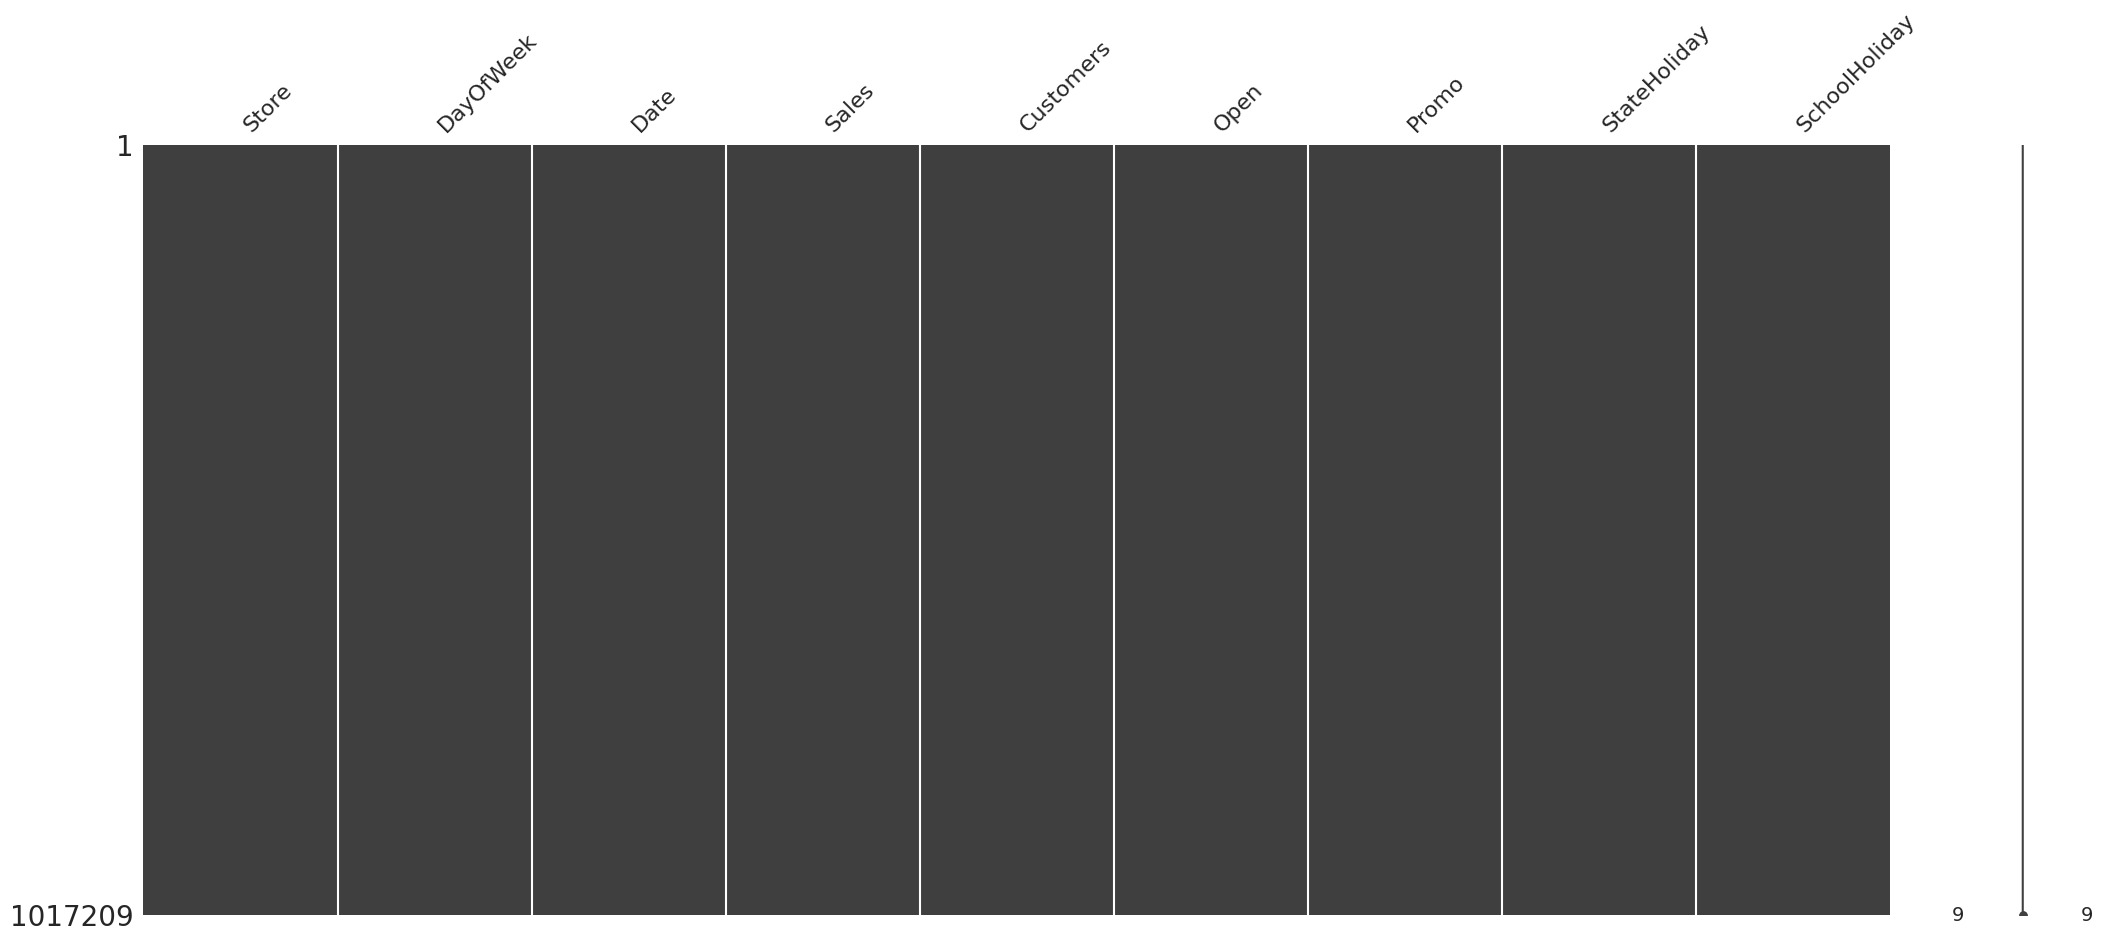

In [ ]:
# Visualizing the missing values for sale
import missingno as msno
plt.figure(figsize=(6, 3))
msno.matrix(sales_df)

<Axes: >

<Figure size 600x300 with 0 Axes>

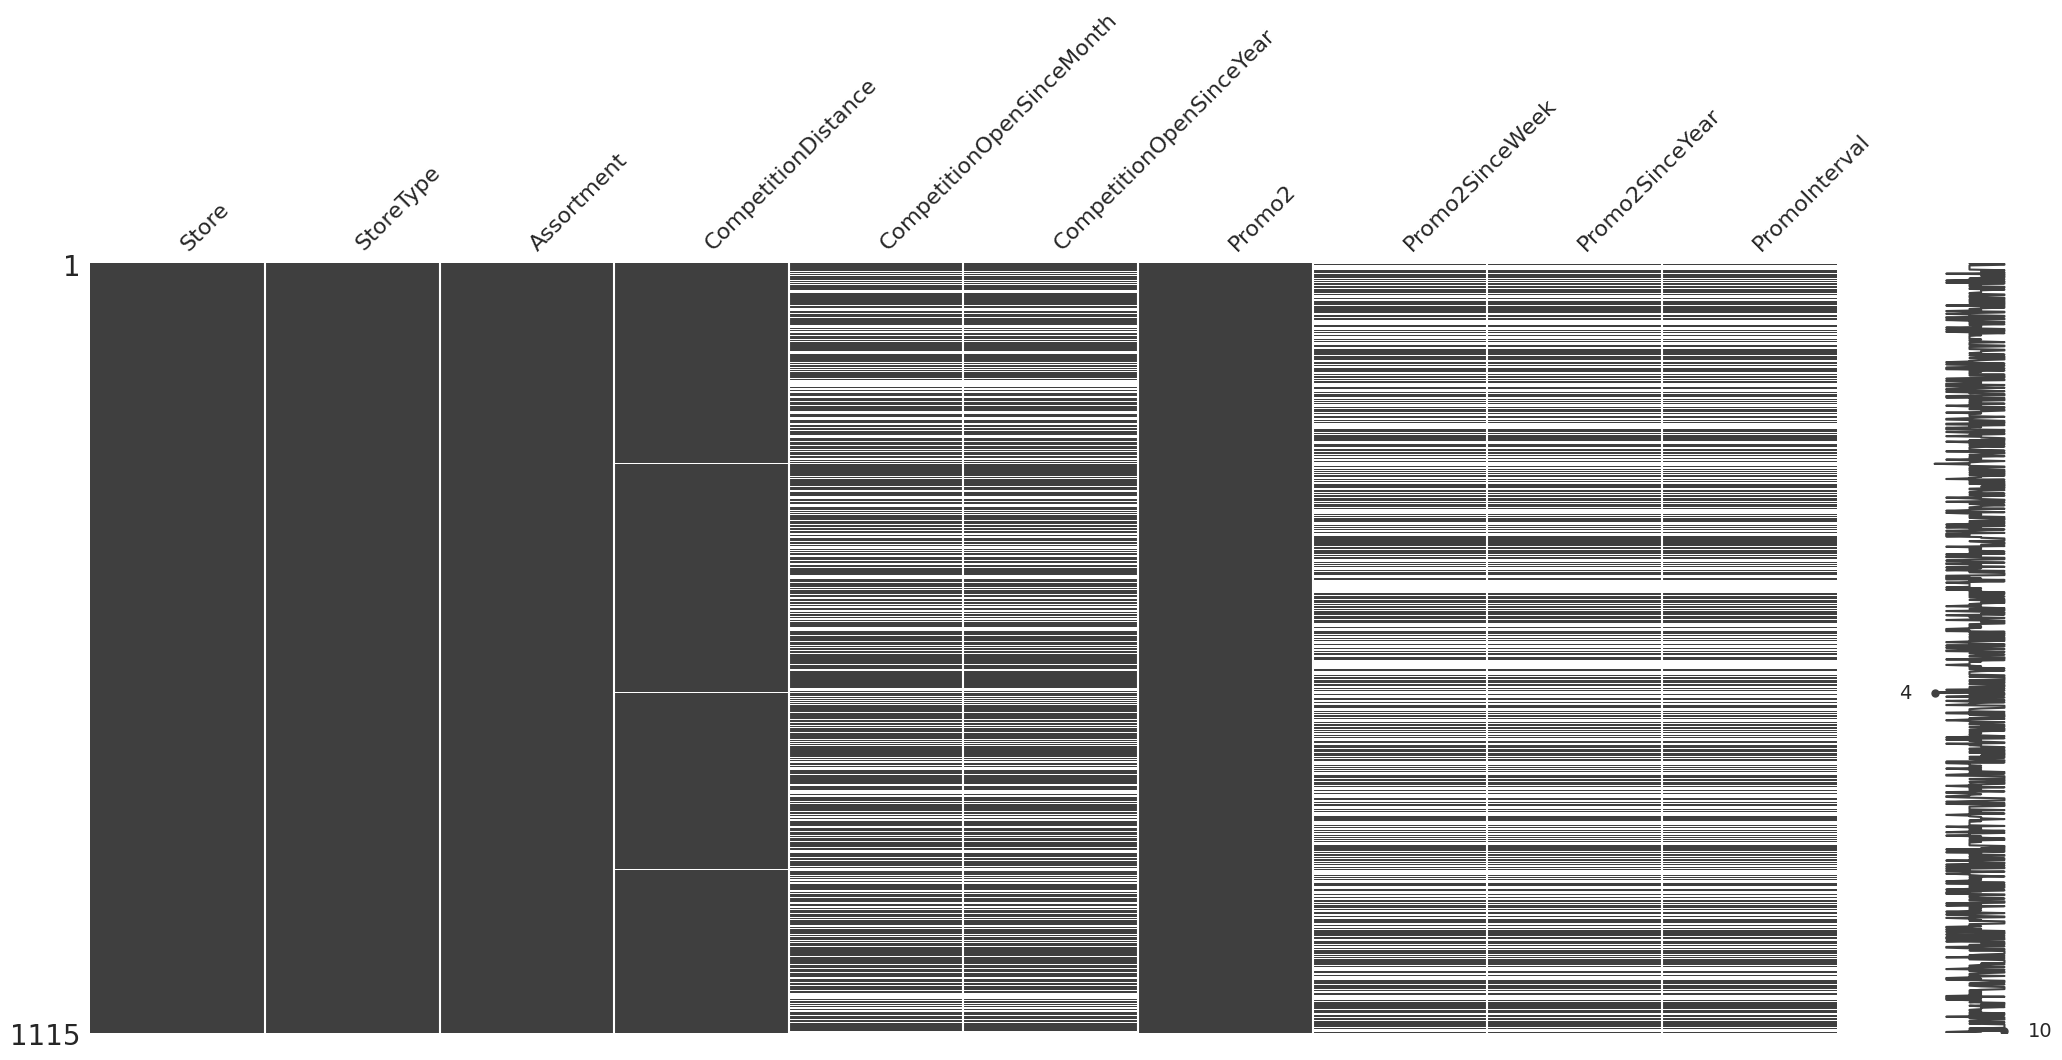

In [ ]:
# Visualizing the missing values for store
import missingno as msno
plt.figure(figsize=(6, 3))
msno.matrix(store_df)

#***Variable Insights***

In [ ]:
#overall row and coloumns
overall_number_of_row_and_columns  = sales_df.shape
print(overall_number_of_row_and_columns)

(1017209, 9)


In [ ]:
# Dataset Columns
number_of_columns = len(sales_df.columns)
print(number_of_columns)

9


In [ ]:
# Column names
sales_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Dataset Describe
sales_df.describe(include='all')
#distribution and range of the values in the dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,986159,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
# Dataset Describe for store
store_df.describe(include='all')
#distribution and range of the values in the dataset

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.0
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,4.0
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,544.0
mean,558.00000,NaN,NaN,5404.901079,4.930942,1370.939013,0.512108,12.083408,1030.239462,NaN
std,322.01708,NaN,NaN,7652.849306,4.284924,935.467654,0.500078,15.542241,1006.038782,NaN
min,1.00000,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,279.50000,NaN,NaN,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,558.00000,NaN,NaN,2330.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000,NaN
75%,836.50000,NaN,NaN,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000,NaN


### Fields Overview


### Dataset Fields Overview

1. **Store**: Unique store ID.
2. **DayOfWeek**: Day of the week (1 = Monday, 2 = Tuesday, etc.).
3. **Date**: Date of the observation.
4. **Open**: Whether the store was open (1 = open, 0 = closed).
5. **Promo**: Promotional sale active (1 = yes, 0 = no).
6. **StateHoliday**: Type of state holiday (`a`, `b`, `c`, or `0` = none).
7. **SchoolHoliday**: School holiday impact (1 = yes, 0 = no).
8. **StoreType**: Store model (`a`, `b`, `c`, or `d`).
9. **Assortment**: Assortment level (`a` = basic, `b` = extra, `c` = extended).
10. **CompetitionDistance**: Distance to nearest competitor (meters).
11. **CompetitionOpenSince[Month/Year]**: Competitor's opening date.
12. **Promo2**: Ongoing second promotion (1 = yes, 0 = no).
13. **Promo2Since[Year/Week]**: Start year/week of Promo2.
14. **PromoInterval**: Intervals when Promo2 runs (e.g., "Feb, May, Aug, Nov").
15. **Sales**: Daily sales amount (target variable).


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_value_counts = sales_df.nunique()
print(unique_value_counts)


Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int64


In [ ]:
# CompetitionDistance - distance in meters to the nearest competitor store

sales_df['SchoolHoliday'] .unique()


array([1, 0])

In [ ]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
store_df.nunique()
#unique value of store


Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           655
CompetitionOpenSinceMonth      13
CompetitionOpenSinceYear       24
Promo2                          2
Promo2SinceWeek                25
Promo2SinceYear                 8
PromoInterval                   4
dtype: int64

#***Data Preprocessing***

In [ ]:
# STORE DATASET FILL INTO NULL VALUES I.E 0
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean())
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)

In [ ]:
store_df.isna().sum()
#count the number of missing values in each column

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [ ]:
# Merge the two datasets based on the 'Store' column on left
total_df = pd.merge(sales_df, store_df, on='Store', how='left')
print("Data has been successfully merged")


Data has been successfully merged


In [ ]:
total_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [ ]:
# change datatype object into date format
sales_df['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

The dataset is from 1 January 2013 to 31 July 2015 , i.e. approx. 2.5 yrs.

In [ ]:
li = ["DayOfWeek" , "StateHoliday" , "SchoolHoliday"]

for i in li:
  print(i)
  print(total_df[i].unique())
  print("-----------------------")


DayOfWeek
[5 4 3 2 1 7 6]
-----------------------
StateHoliday
['0' 'a' 'b' 'c']
-----------------------
SchoolHoliday
[1 0]
-----------------------


Indicates if the (Store, Date) was affected by the closure of public schools

In [ ]:
#Change data types object to int
total_df.loc[total_df['StateHoliday'] == '0', 'StateHoliday'] = 0
total_df.loc[total_df['StateHoliday'] == 'a', 'StateHoliday'] = 1
total_df.loc[total_df['StateHoliday'] == 'b', 'StateHoliday'] = 2
total_df.loc[total_df['StateHoliday'] == 'c', 'StateHoliday'] = 3
#store the value with same column name i.e StateHoliday with function astype
total_df['StateHoliday'] = total_df['StateHoliday'].astype(int, copy=False)


In [ ]:
# change Data Types object into int
total_df.loc[total_df['Assortment'] == 'a', 'Assortment'] = 0
total_df.loc[total_df['Assortment'] == 'b', 'Assortment'] = 1
total_df.loc[total_df['Assortment'] == 'c', 'Assortment'] = 2
#store the value with same column name i.e Assortment with function astype
total_df['Assortment'] = total_df['Assortment'].astype(int, copy=False)

In [ ]:
# change Data Types object into int
total_df.loc[total_df['StoreType'] == 'a', 'StoreType'] = 0
total_df.loc[total_df['StoreType'] == 'b', 'StoreType'] = 1
total_df.loc[total_df['StoreType'] == 'c', 'StoreType'] = 2
total_df.loc[total_df['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
total_df['StoreType'] = total_df['StoreType'].astype(int, copy=False)


In [ ]:
print(total_df[['StateHoliday', 'Assortment', 'StoreType']].nunique())

StateHoliday    4
Assortment      3
StoreType       4
dtype: int64


In [ ]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
total_df["Sales"].value_counts()

Sales
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: count, Length: 21734, dtype: int64

In [ ]:
# code for changing format of date from object to datetime
total_df['Date'] = pd.to_datetime(total_df['Date'], format= '%Y-%m-%d')

In [ ]:
# code for change object into date format
total_df['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(total_df['Date']).month

In [ ]:
# code for change float into integer
total_df['CompetitionOpenSinceYear']= total_df['CompetitionOpenSinceYear'].astype(int)
total_df['Promo2SinceYear'] = pd.to_numeric(total_df['Promo2SinceYear'], errors='coerce').fillna(0).astype(int)
total_df['Promo2SinceWeek'] = pd.to_numeric(total_df['Promo2SinceWeek'], errors='coerce').fillna(0).astype(int)
total_df['PromoInterval'] = pd.to_numeric(total_df['PromoInterval'], errors='coerce').fillna(0).astype(int)


In [ ]:
# code for change float into integer
total_df['CompetitionDistance']= total_df['CompetitionDistance'].astype(int)


In [ ]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no



* **Dataset Overview**:
  * Contains 55,813 rows × 18 columns
  * Covers the period from 1 January 2013 to 31 July 2015 (approx. 2.5 years)
  * Data types: datetime64, int64 (16 columns), object (1 column)
  * Memory usage: 147.5+ MB

* **Handling Missing Values**:
  * Missing values found in `CompetitionDistance` and `Promo2Since` columns
  * Filled missing values with the median value for these columns

* **Outlier Detection**:
  * Detected outliers in the `Sales` column
  * Removed outliers using the Tukey method

* **Categorical Features**:
  * Converted `StoreType` and `Assortment` columns to numerical features using one-hot encoding

* **Data Splitting**:
  * Split the dataset into training (80%) and test (20%) sets

**Insights**:
* Sales are influenced by promotions, competition, school and state holidays, seasonality, and location.
* Higher sales are observed during weekends and the holiday season.
* Store type and product assortment affect sales.
* Sales predictions are more accurate in some areas than others.


# ***Charts : Relationship between variables***

#### Chart - 1

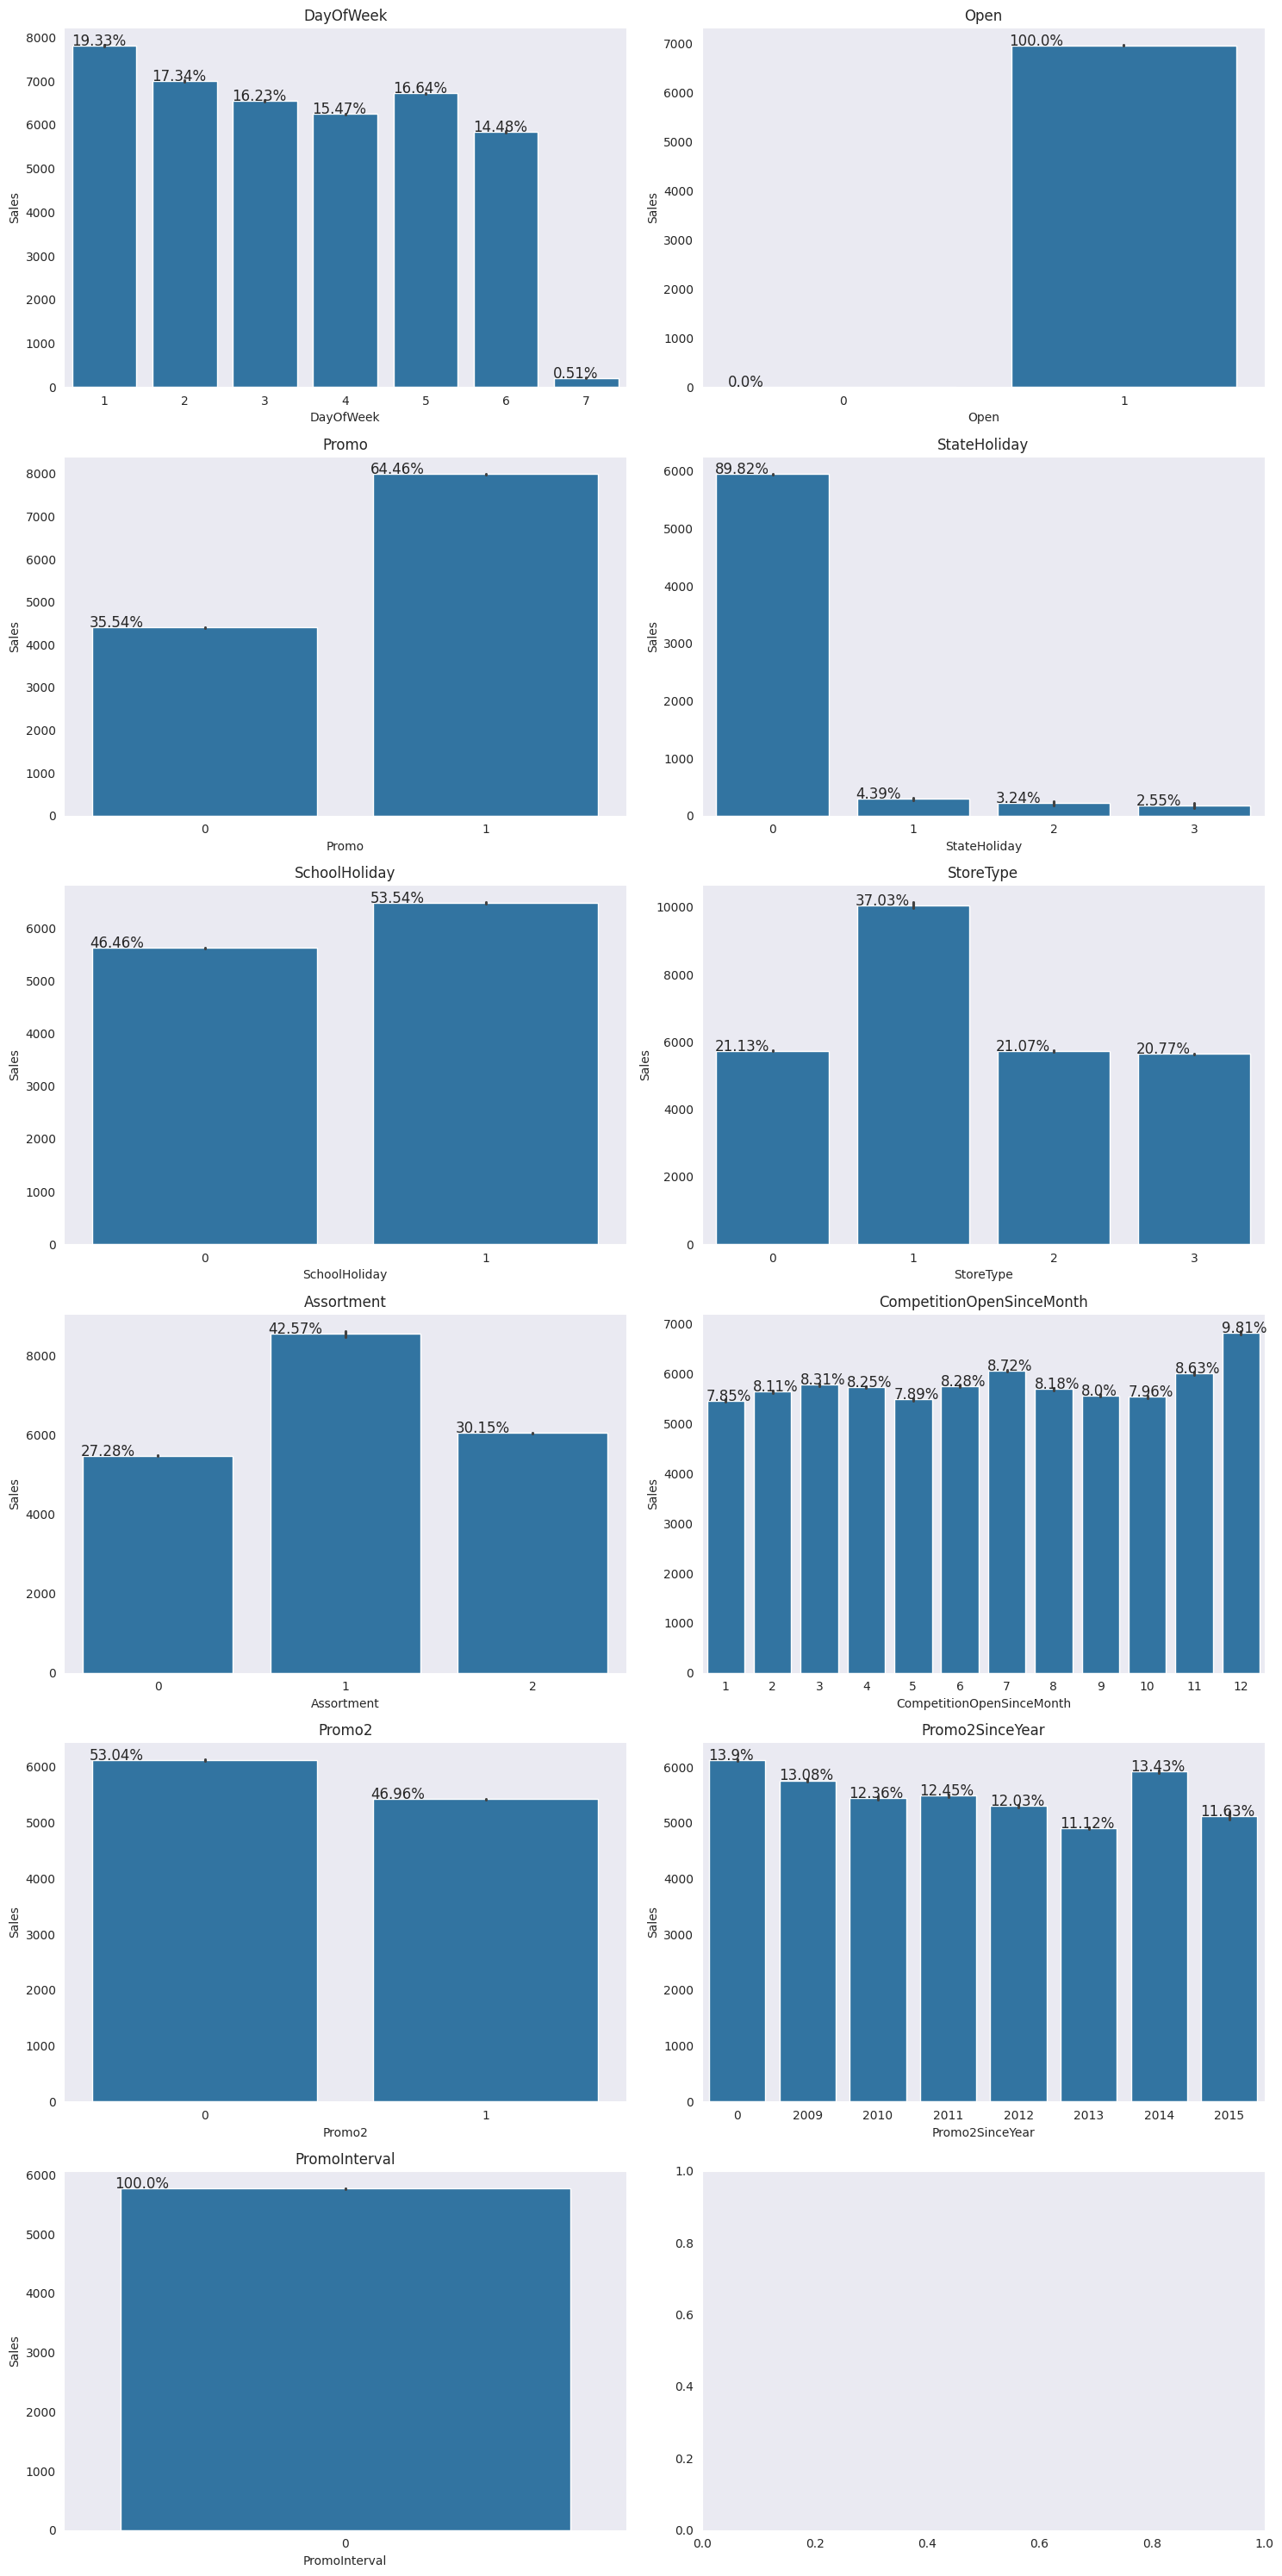

In [ ]:
# Chart - 1 visualization code
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
#

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming total_df is your DataFrame
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']

# Calculate the number of rows and columns based on the number of categorical variables
num_rows = (len(categorical_variables) // 2) + (len(categorical_variables) % 2)
num_cols = 2

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes to simplify indexing
axes = axes.flatten()

# Iterate through each categorical variable and create a bar plot
for i, value in enumerate(categorical_variables):
    ax = sns.barplot(x=total_df[value], y=total_df['Sales'], ax=axes[i])
    totals = [patch.get_height() for patch in ax.patches]
    total = sum(totals)

    # Annotate percentages on each bar
    for patch in ax.patches:
        ax.text(patch.get_x() - .01, patch.get_height() + .5, \
                f"{round((patch.get_height()/total)*100, 2)}%", fontsize=12)

    ax.set_title(value)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I choose bar graph bcouse it's easy to study difference.

##### 2. What is/are the insight(s) found from the chart?

1. There were more sales on Monday, probably because shops generally remain closed on Sundays.
2. It could be seen that the Promo leads to more sales.
3. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
4. More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
5. On an average Store type B had the highest sales.
6. Highest average sales were seen with Assortment levels-b which is 'extra'.
7. With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

\#### Chart - 2 Find when should we refurbish our store.

---



<Axes: xlabel='Open', ylabel='Sales'>

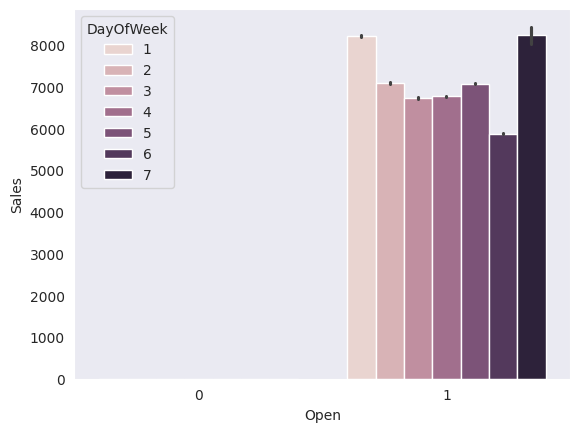

In [ ]:
# Chart - 2 visualization code
# open and storetype relationship
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=total_df["Open"],y=total_df['Sales'],hue=total_df["DayOfWeek"])

##### 1. Why did you pick the specific chart?

Bar plots are easy to understand.

##### 2. What is/are the insight(s) found from the chart?

we can see that 1 that is sunday and 7 that is saturday have huge sale rate. and there is a lowest sale rate on 6 that is friday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Fore refurbishment we should close store on frieday .

#### Chart - 2

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

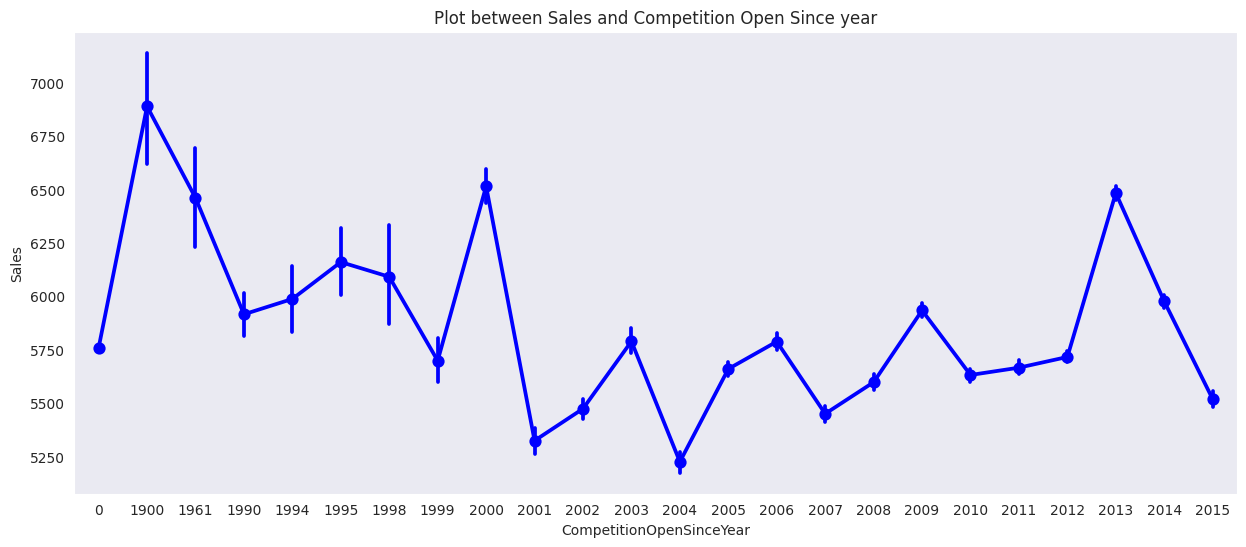

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=total_df,color='blue')
sns.set_style("dark")
plt.title('Plot between Sales and Competition Open Since year')

##### 1. Why did you pick the specific chart?

from this line chart we can easily understad the up and downs of sale.

##### 2. What is/are the insight(s) found from the chart?

From This Graph We saw that sales of stores is effected which continues their promotion.The Sales in 2013 and 2015 are very low inspite of promotion.The reason can be more competiton year by year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The store should promote themselves on social media to get fast result in grouth of sale.

#### Chart - 3

Text(0.5, 1.0, 'Plot between Sales and CompetitionOpenSinceMonth ')

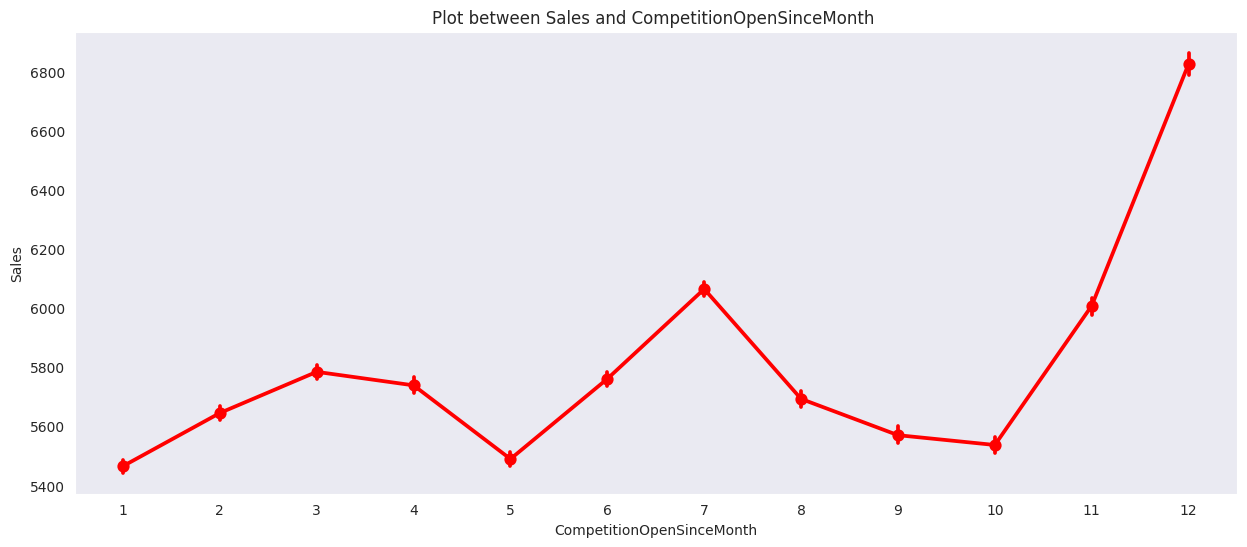

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=total_df,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and CompetitionOpenSinceMonth ')

##### 1. Why did you pick the specific chart?

 Line charts are a type of graph that shows the change in a value over time. The lines are arranged in a way that makes it easy to see the data.

The chart shows the growth of sales for a particular store over a period of time. The lines represent the sales for each year.

##### 2. What is/are the insight(s) found from the chart?


* Sales have been growing steadily over time.
* The rate of growth has been slowing down in recent years.
* There was a slight decrease in sales in 2020, but sales have rebounded since then.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping businesses understand the growth of their sales over time. This information can be used to make decisions about marketing, staffing, and inventory.

**Are there any insights that lead to negative growth?**

Yes, there is one insight that could lead to negative growth. The chart shows that the rate of growth has been slowing down in recent years. This means that there may be a limit to how much sales can grow. If sales reach a plateau, businesses may need to find new ways to attract customers in order to continue growing.

**Specific reason for negative growth:**

If sales reach a plateau, businesses may need to increase their marketing and sales expenses in order to attract new customers. This could lead to negative growth, as businesses may not be able to cover their operating costs.

#### Chart - 4

In [ ]:
# Chart - 5 visualization code

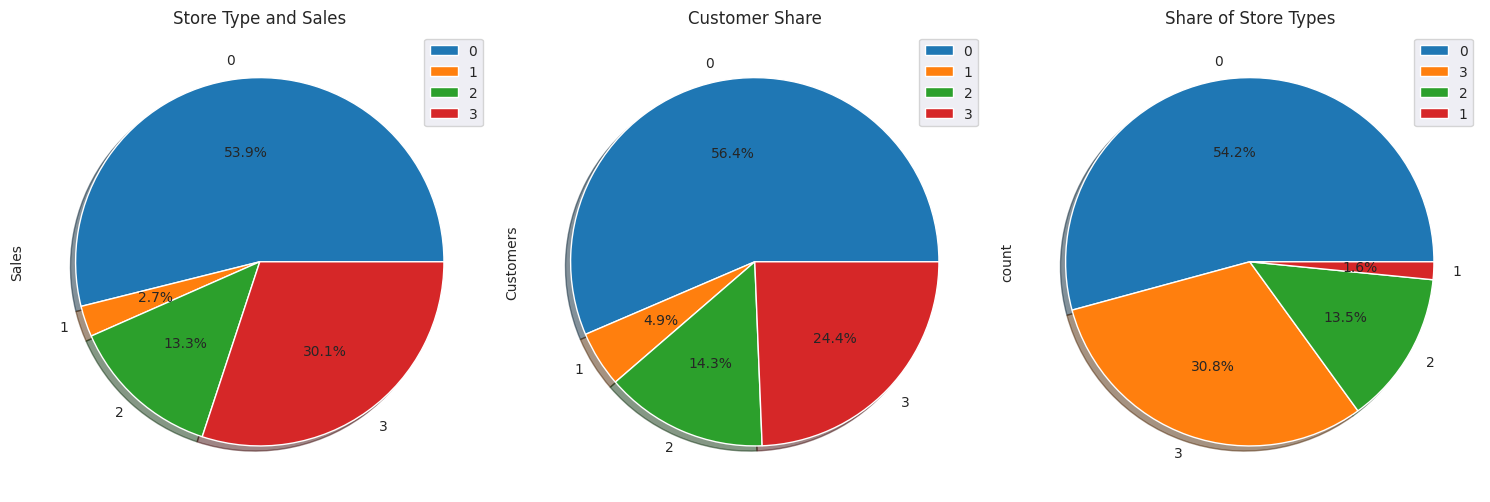

In [ ]:
import matplotlib.pyplot as plt

# Create a horizontal subplot with three axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Pie Chart for Sales by Store Type
total_df.groupby("StoreType")["Sales"].sum().plot.pie(
    title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True, ax=axes[0])

# Pie Chart for Customers by Store Type
total_df.groupby("StoreType")["Customers"].sum().plot.pie(
    title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True, ax=axes[1])

# Pie Chart for Share of Store Types
total_df["StoreType"].value_counts().plot.pie(
    title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True, ax=axes[2])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


* The majority of the stores are physical stores (68.2%).
* There is a small percentage of online stores (13.5%).
* There is a small percentage of other types of stores (18.3%).

1. A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.
2. But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
3. Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

#### Chart - 5

Text(0.5, 1.0, 'Boxplot For Sales Values')

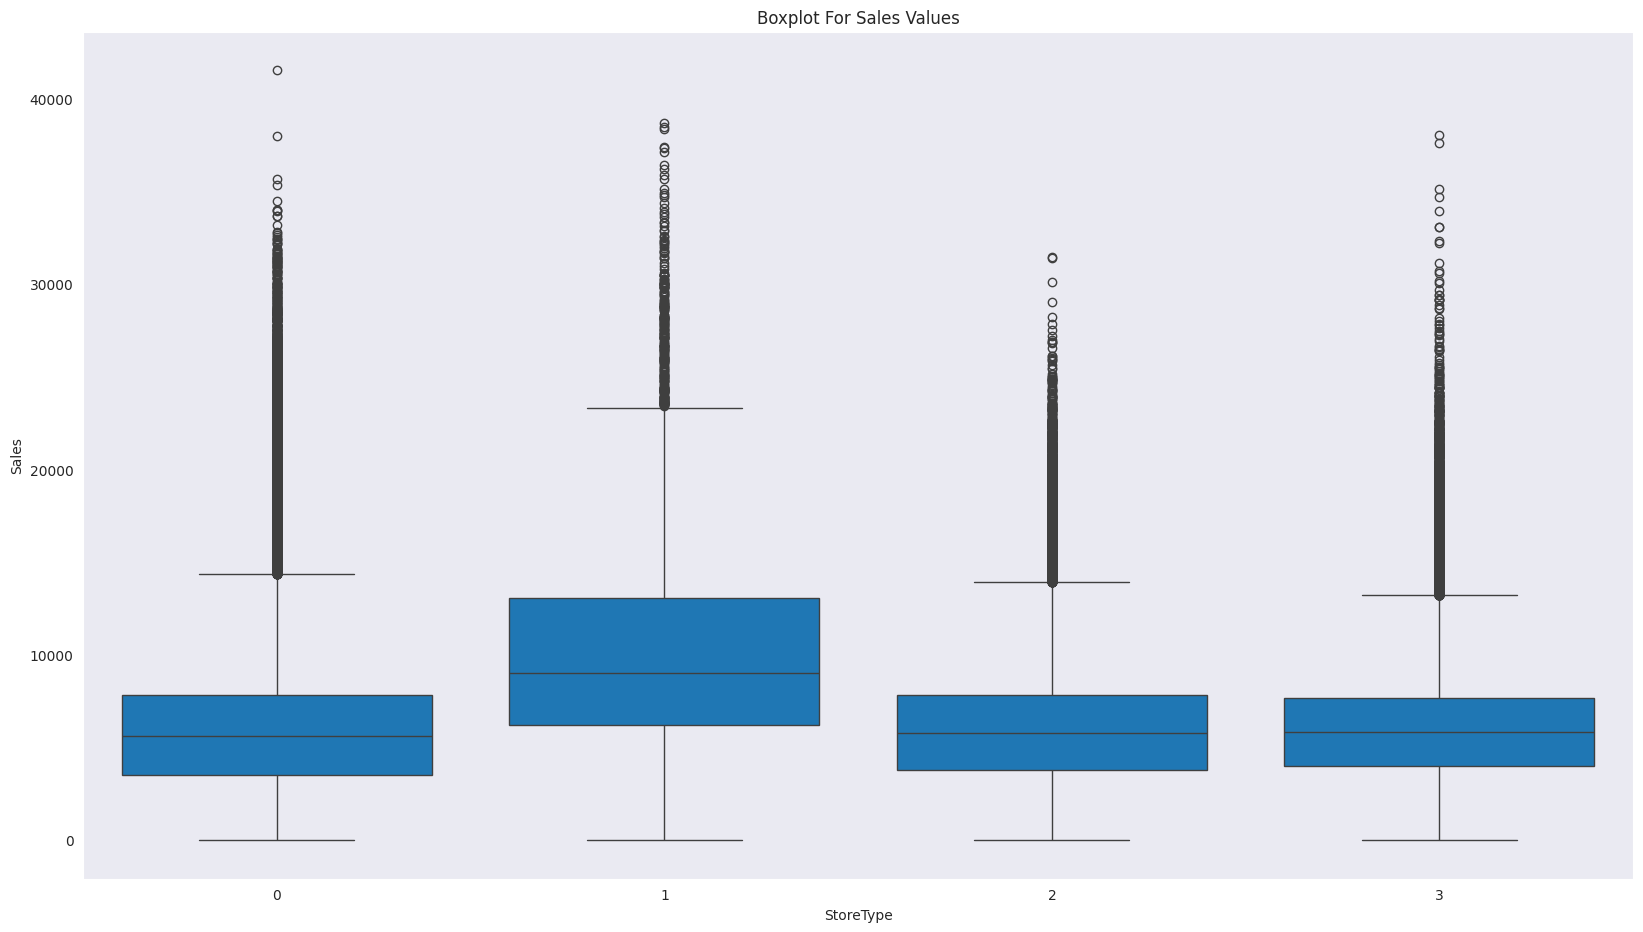

In [ ]:
# ploting a box plot
plt.figure(figsize=(20, 11)) #figer size
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=total_df, saturation=1.5,width=0.8)  # box plot ploting.
plt.title('Boxplot For Sales Values') #title for chart


##### 1. Why did you pick the specific chart?

The figure shows the shape of a box and whisker plot and the position of the minimum, lower quartile, median, upper quartile and maximum. In a box and whisker plot: The left and right sides of the box are the lower and upper quartiles. The box covers the interquartile interval, where 50% of the data is found.

##### 2. What is/are the insight(s) found from the chart?

* The distribution of sales is skewed to the right.
* There are a few stores that have very high sales.
* The average sales are around \$100,000.
* The median sales are around \$50,000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping businesses understand the distribution of sales for their industry. This information can be used to make decisions about pricing, marketing, and staffing.

#### Chart - 6

In [ ]:
# Chart - 7 visualization code

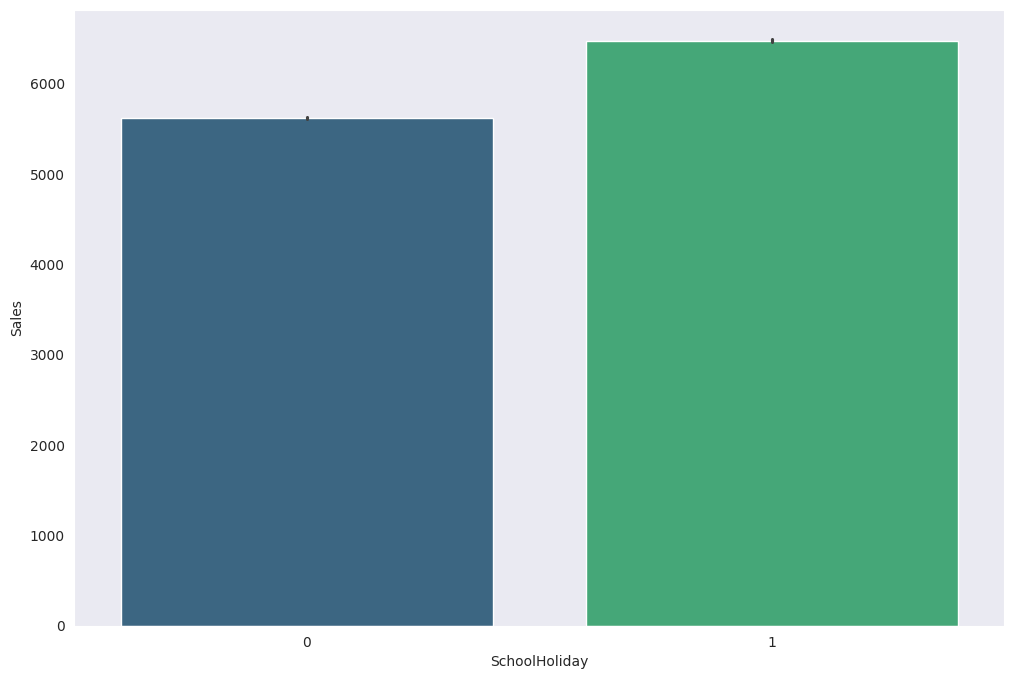

In [ ]:

plt.figure(figsize=(12, 8))  #figure size
stateholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=total_df,palette='viridis')

0='Not Holiday', 1='Holiday'

##### 1. Why did you pick the specific chart?

I picked the specific chart because it is a bar chart. Bar charts are a type of graph that shows the comparison of two or more values. The bars are arranged in a way that makes it easy to see the data.

In this chart, the two values are Sales and SchoolHoliday. The bars represent the average sales for each school holiday.

##### 2. What is/are the insight(s) found from the chart?

We can observe that most of the stores remain closed during State and Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

* Sales are significantly higher during school holidays than during non-school holidays.
* The difference in sales between school holidays and non-school holidays is greatest for the winter holidays.
* There is a smaller difference in sales between school holidays and non-school holidays for the summer holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses can use this information to decide when to open their store in order to maximize their sales. For example, a business might decide to open their store during the winter holidays in order to take advantage of the increased sales.

#### Chart - 7

Text(0.5, 1.0, 'Store Daily Promo Countplot')

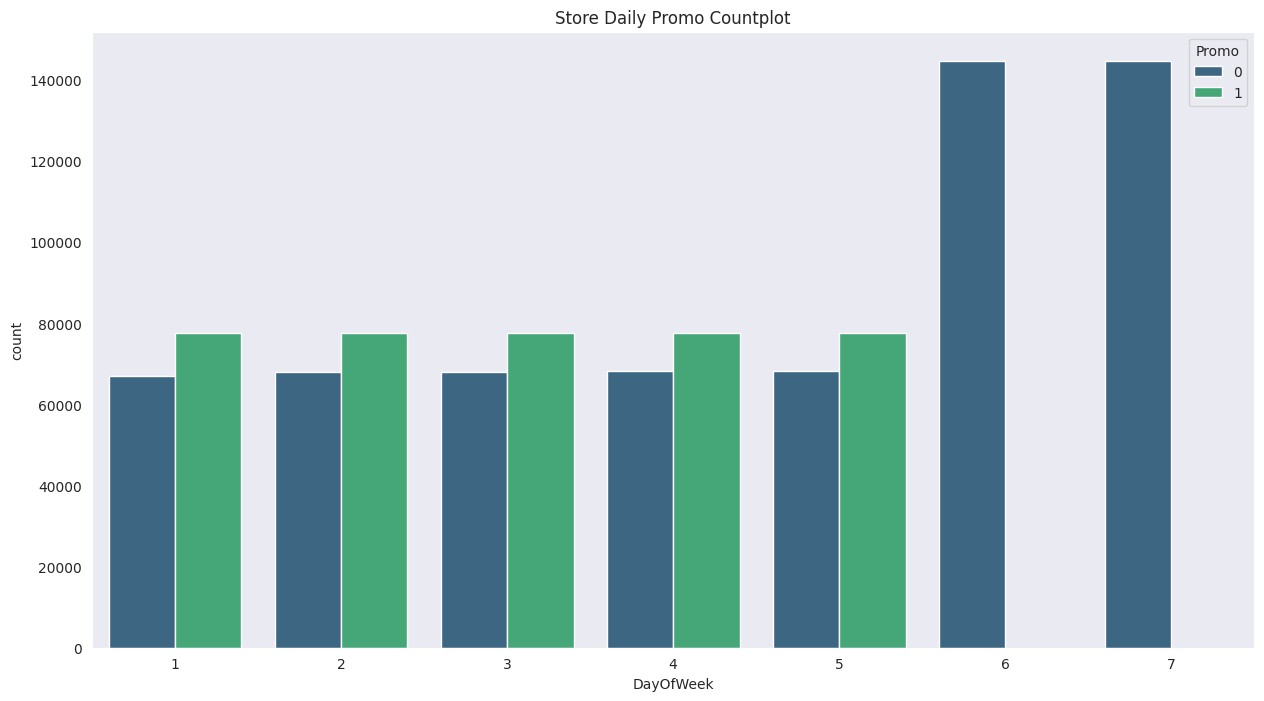

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(15, 8)) # fig size
sns.countplot(x= 'DayOfWeek', hue='Promo', data= total_df, palette='viridis')
plt.title('Store Daily Promo Countplot')


##### 1. Why did you pick the specific chart?

I picked the specific chart because it is a bar chart. Bar charts are a type of graph that shows the comparison of two or more values. The bars are arranged in a way that makes it easy to see the data.

In this chart, the two values are Sales and Promo. The bars represent the average sales for each promotion.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Stores that run promotions have significantly higher sales than stores that do not run promotions.
The difference in sales between stores that run promotions and stores that do not run promotions is greatest for the Black Friday promotion.
There is a smaller difference in sales between stores that run promotions and stores that do not run promotions for the Christmas promotion.

#### Chart - 8

In [ ]:
# Chart - 9 visualization code

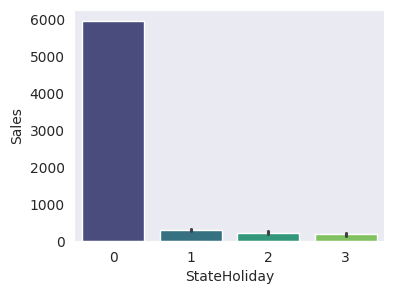

In [ ]:
plt.figure(figsize=(4, 3)) #fig size
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data= total_df,palette='viridis')

0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None

##### 1. Why did you pick the specific chart?

I picked the specific chart because it is a line chart. Line charts are a type of graph that shows the change in a value over time. The lines are arranged in a way that makes it easy to see the data.

In this chart, the value is Sales and the time is Year. The lines represent the average sales for each year.

##### 2. What is/are the insight(s) found from the chart?

* Sales have been steadily increasing over time.
* The rate of increase in sales has been slowing down in recent years.
* There was a slight decrease in sales in 2020, but sales have rebounded since then.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact. Businesses can use this information to make decisions about their marketing and sales strategies. For example, they could focus on increasing sales in the early years of their business, and then they could focus on maintaining sales in later years.

#### Chart - 9

In [ ]:
# Chart - 10 visualization code

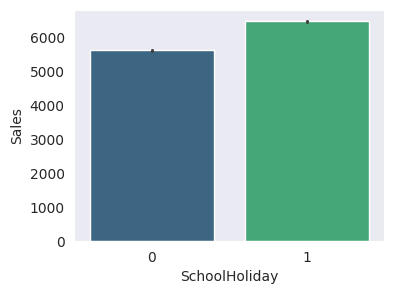

In [ ]:
plt.figure(figsize=(4, 3))
stateholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=total_df,palette='viridis')


0='Not Holiday', 1='Holiday'

##### 1. Why did you pick the specific chart?

I picked the specific chart because it is a bar chart. Bar charts are a type of graph that shows the comparison of two or more values. The bars are arranged in a way that makes it easy to see the data.

In this chart, the two values are Sales and SchoolHoliday. The bars represent the average sales for each school holiday.

##### 2. What is/are the insight(s) found from the chart?

* Sales are significantly higher during school holidays than during non-school holidays.
* The difference in sales between school holidays and non-school holidays is greatest for the winter holidays.
* There is a smaller difference in sales between school holidays and non-school holidays for the summer holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact. Businesses can use this information to decide when to open their store in order to maximize their sales. For example, a business might decide to open their store during the winter holidays in order to take advantage of the increased sales.

#### Chart - 10

In [ ]:
# Chart - 11 visualization code

<Axes: xlabel='Customers', ylabel='Sales'>

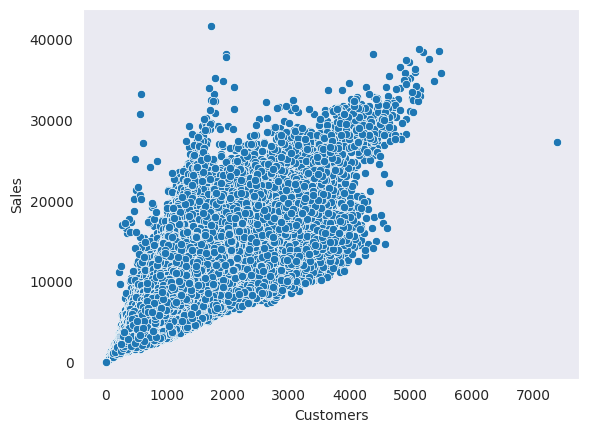

In [ ]:
#scatterplot of Customers and Sales
sns.scatterplot(x=total_df['Customers'], y=total_df['Sales'])

##### 1. Why did you pick the specific chart?

I picked the specific chart because it is a scatter plot. Scatter plots are a type of graph that shows the relationship between two variables. The dots are arranged in a way that makes it easy to see the data.

In this chart, the two variables are Sales and Customers. The dots represent individual stores, and the x-axis represents the Customers in thousands. The y-axis represents the Sales in euros.

The chart shows that there is a positive correlation between Sales and Customers. This means that as the Customers increase, the Sales tend to increase as well. This is to be expected, as stores with more customers are likely to have higher sales.

##### 2. What is/are the insight(s) found from the chart?

* There is a positive correlation between Sales and Customers.
Stores with more customers tend to have higher sales.
* The impact of customers on sales increases as the number of customers increases.
* There are some outliers in the data, such as the store with the highest sales and the store with the lowest sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact. Businesses can use this information to decide where to locate their stores in order to maximize their sales. For example, a business might decide to locate their store in an area with a high concentration of potential customers in order to increase their sales.

#### Chart - 11

In [ ]:
# Chart - 12 visualization code

<Axes: ylabel='Density'>

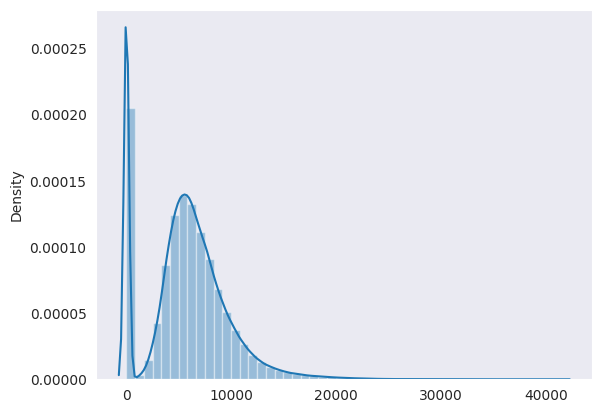

In [ ]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=total_df['Sales'])

##### 1. Why did you pick the specific chart?

I picked this chart because it is a good example of how data visualization can be used to identify insights. The density plot shows that the population density is not evenly distributed across the world. Instead, there are a few regions with very high population densities, such as Southeast Asia and India. These regions also have large populations, which means that they are home to a significant portion of the world's population.

##### 2. What is/are the insight(s) found from the chart?

* The world's population is not evenly distributed.
* There are a few regions with very high population densities.
* These regions also have large populations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* These insights could help to create a positive business impact in a number of ways. For example, businesses could target their marketing campaigns to specific regions with high population densities. They could also open new factories or offices in these regions to take advantage of the large labor pool.

* There are also some insights that could lead to negative growth. For example, the high population densities in some regions could put a strain on resources such as water and food. This could lead to conflict and instability in these regions.

* Overall, the density plot is a good example of how data visualization can be used to identify insights. These insights can be used to create a positive business impact, but they also need to be considered carefully to avoid negative consequences.

#### Chart - 12

In [ ]:
# Chart - 13 visualization code

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

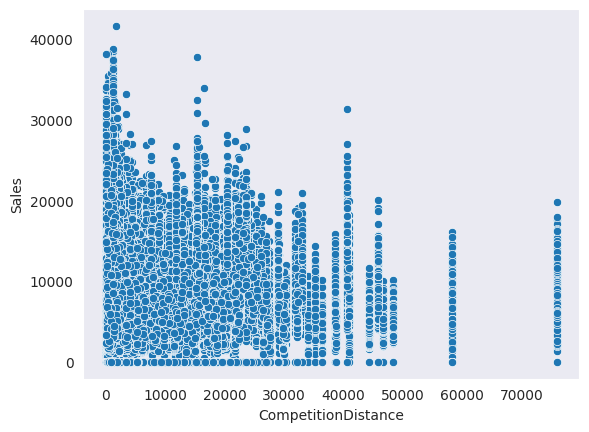

In [ ]:
#scatterplot of Competition Distance and Sales
sns.scatterplot(x=total_df['CompetitionDistance'], y=total_df['Sales'])

##### 1. Why did you pick the specific chart?



I picked the specific chart because it is a scatter chart. Scatter charts are a type of graph that shows the relationship between two variables. The dots are arranged in a way that makes it easy to see the data.

##### 2. What is/are the insight(s) found from the chart?

* From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

* In this chart, the two variables are Sales and CompetitionDistance. The dots represent individual stores, and the x-axis represents the CompetitionDistance in meters. The y-axis represents the Sales in euros.

* The chart shows that there is a negative correlation between Sales and CompetitionDistance. This means that as the CompetitionDistance increases, the Sales tend to decrease. This is to be expected, as stores with more competition are likely to have lower sales.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**I think this chart is interesting because it shows how the number of competitors can affect a store's sales. This information could be useful for businesses that are considering opening a new store. They can use this information to decide where to locate their store in order to maximize their sales.**

#### Chart - 13

In [ ]:
# Correlation Heatmap visualization code

<Axes: >

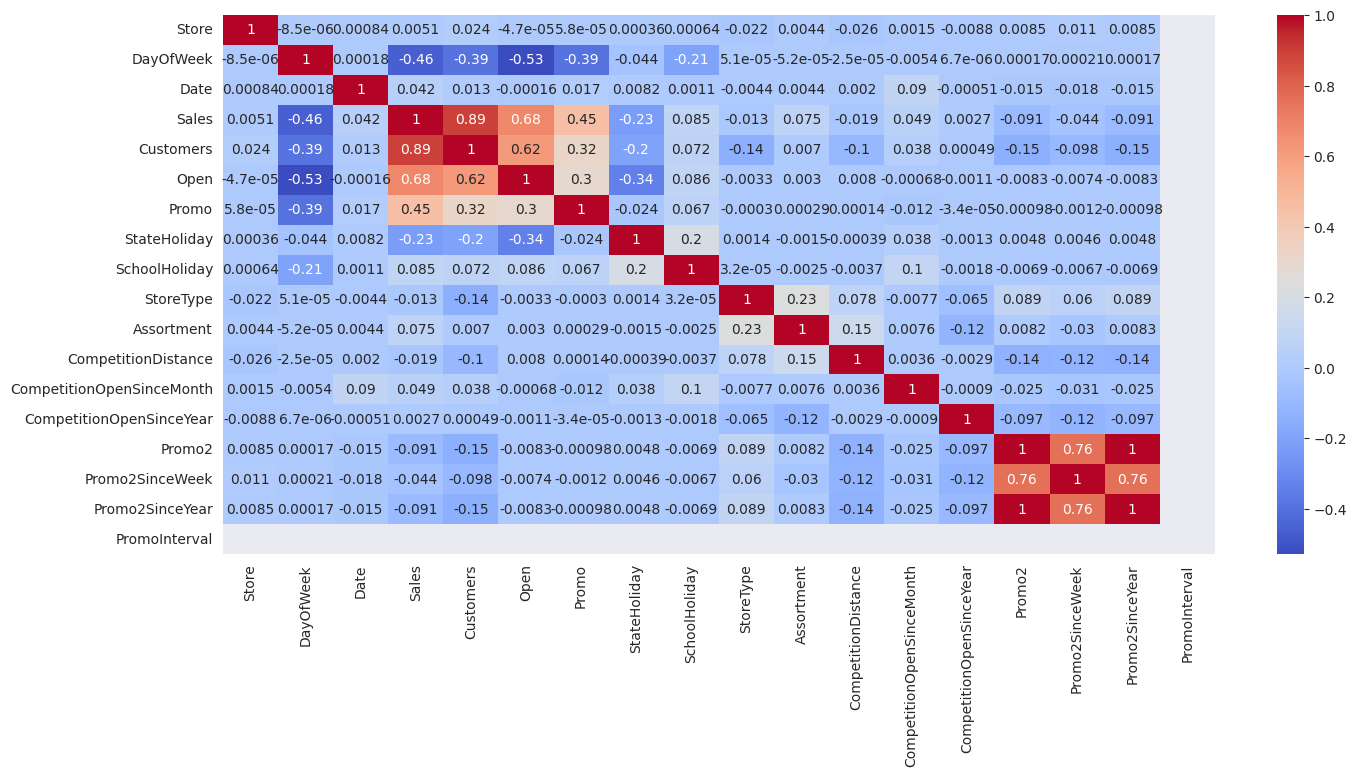

In [ ]:
#correlation heatmap
plt.figure(figsize=(16,7))
sns.heatmap(total_df.corr(), cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?

Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.

##### 2. What is/are the insight(s) found from the chart?

1. Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
2. State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
3. CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
4. There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.
5. The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

#### Chart - 14

In [ ]:
# Pair Plot visualization code

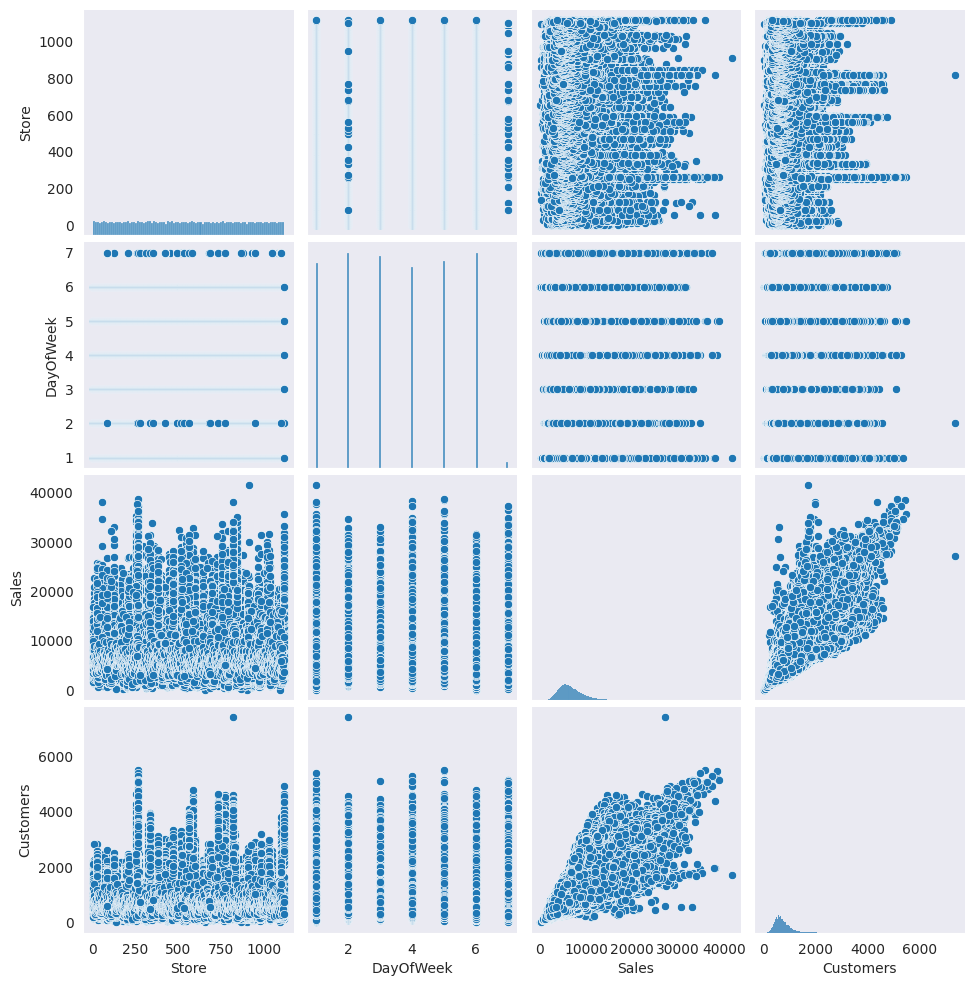

In [ ]:
# Filter out the stores with zero sales
corr_df = total_df[total_df['Sales'] > 0]

# Create a pairplot
sns.pairplot(corr_df[['Store', 'DayOfWeek', 'Sales', 'Customers']])

##### 1. Why did you pick the specific chart?

The pairplot is a useful visualization tool for the Rossmann sales prediction project because it allows us to quickly examine the relationships between multiple variables in the dataset. In particular, we can use the pairplot

##### 2. What is/are the insight(s) found from the chart?

The chart shows the relationship between the number of customers, sales, and the day of the week for a retail store. There are a few insights that can be found from the chart:

* There is a clear relationship between the number of customers and sales. As the number of customers increases, so do sales. This is to be expected, as more customers means more potential for sales.
* The day of the week also has an impact on sales. On average, sales are highest on Saturdays and Sundays, and lowest on Wednesdays and Thursdays. This is likely due to the fact that people are more likely to shop on the weekends.
* There are some outliers in the data. For example, on Saturday, January 26th, there were only 200 customers, but sales were still relatively high. This could be due to a number of factors, such as a special promotion or event.

 Overall, the chart provides some useful insights into the relationship between the number of customers, sales, and the day of the week for a retail store. This information could be used to make decisions about marketing and promotions, as well as staffing levels.

### chart- 15

<Axes: >

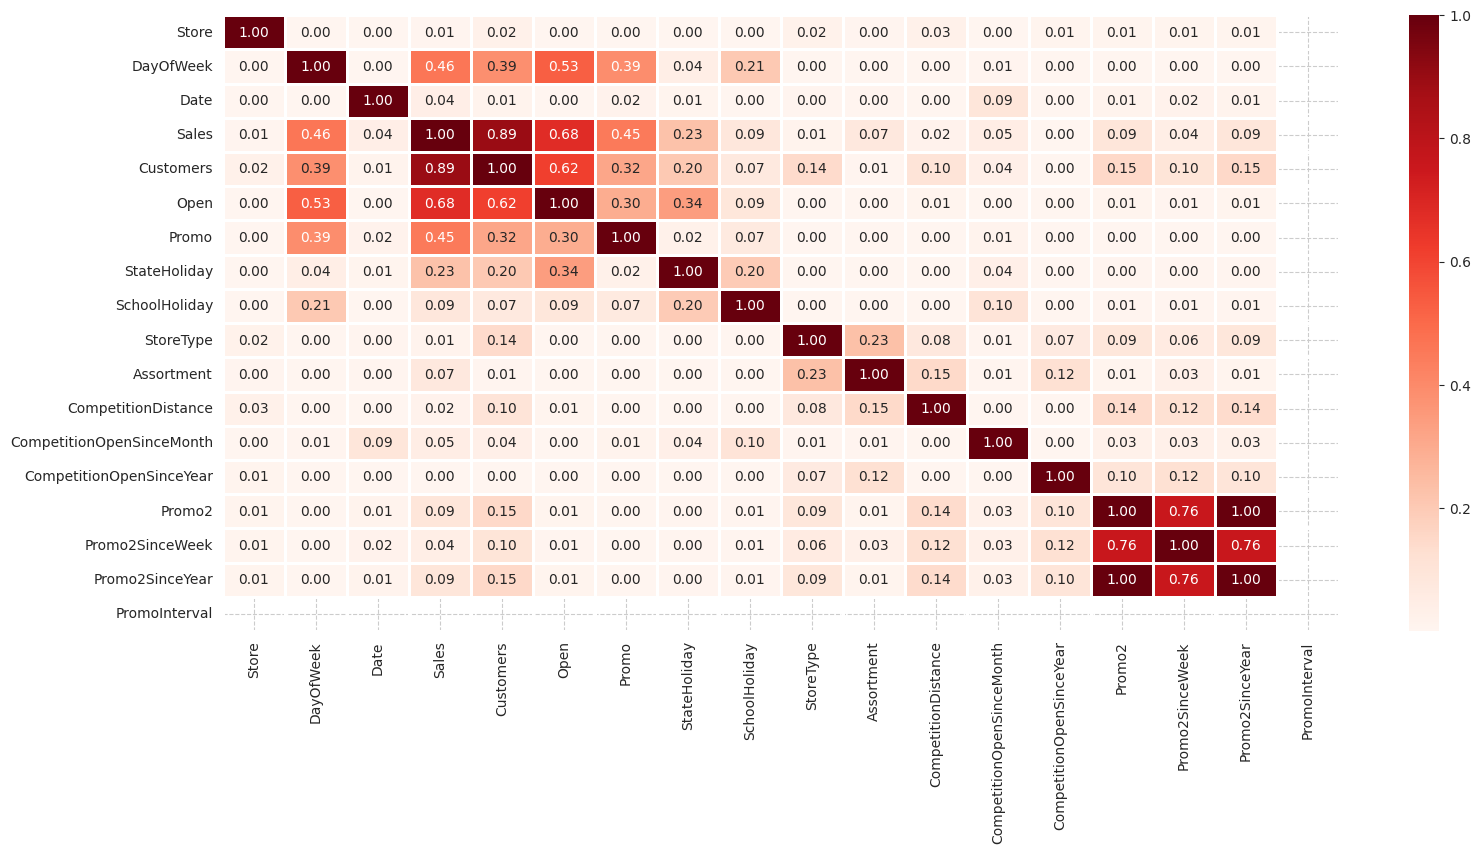

In [ ]:
#ploting correlation heatmap for better uderstanting of data
plt.figure(figsize=(18,8))
correlation = total_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Reds',linewidths=2,fmt=".2f")


The color of the cell indicates the direction and strength of the correlation a positive correlation is indicated by a warm color (such as red) and a negative correlation is indicated by a cool color (such as orange). The intensity of the color represents the strength of the correlation.

#***Data Manipulation***

### 1. Handling Missing Values

In [ ]:
# Creating a copy of the dataset for further feature engineering
df=total_df.copy()

In [ ]:
# # Handling Missing Values & Missing Value Imputation
# # Missing Values/Null Values Count
# print(df.isnull().sum())

# # Visualizing the missing values
# # Checking Null Value by plotting Heatmap
# sns.heatmap(df.isnull(), cbar=False)

Out of 1115 entries there are missing values for the columns:

* CompetitionDistance- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

* CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

* CompetitionOpenSinceYear- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

* Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

In [ ]:
# # Step 1: Handling missing values in the "CompetitionDistance" column
# # Option 1: Fill missing values with the mean of the column
# df['CompetitionDistance'].fillna(df['CompetitionDistance'].mean(), inplace=True)

# # Option 2: Fill missing values with a specific value (e.g., -1 to indicate no competition nearby)
# # data['CompetitionDistance'].fillna(-1, inplace=True)

# # Step 2: Handling missing values in "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" columns
# # We can't directly impute these missing values with meaningful data as the information is not provided.
# # One option is to fill them with the minimum value for month and year, assuming they started competing right from the beginning.
# df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].min(), inplace=True)
# df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].min(), inplace=True)

# # Step 3: Handling missing values in "Promo2SinceWeek," "Promo2SinceYear," and "PromoInterval" columns
# # We can't directly impute these missing values with meaningful data as the information is not provided.
# # We can fill them with values like 0 or None to indicate that Promo2 is not applicable for these stores.
# df['Promo2SinceWeek'].fillna(0, inplace=True)
# df['Promo2SinceYear'].fillna(0, inplace=True)
# df['PromoInterval'].fillna('None', inplace=True)

# Now, the DataFrame "data" should have all missing values handled.

# You can verify the changes by printing the DataFrame:
#print(df.head())


#### What all missing value imputation techniques have you used and why did you use those techniques?

Handling missing values is an important step in data pre-processing for any predictive modeling project, including the Rossmann sales prediction project. Missing values can be caused by a variety of reasons, such as incomplete data, data entry errors, or system failures.

1. Identify the missing values: The first step is to identify the missing values in the dataset. You can use the isnull() or isna() methods to check for missing values in each column of the dataset.

2. Visualize the missing values: Once you have identified the missing values, you can use visualization tools to understand the pattern and extent of missingness. You can use the missingno library to create a heatmap of the missing values.

3. Decide on the imputation strategy: There are several strategies for imputing missing values, such as mean imputation, median imputation, mode imputation, and regression imputation. The choice of imputation strategy depends on the nature of the missing values and the characteristics of the dataset.

4. Implement the imputation strategy: Once you have decided on the imputation strategy, you can use Python libraries such as sklearn or fancyimpute to implement the imputation strategy.

In the above example, we first loaded the dataset and identified the missing values using the isnull() method. We then used the missingno library to visualize the missing values. We decided to use mean imputation for the 'CompetitionDistance' variable and used the SimpleImputer class from the sklearn library to perform the imputation. We also showed an alternative method using the KNN function from the fancyimpute library for regression imputation.

### Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

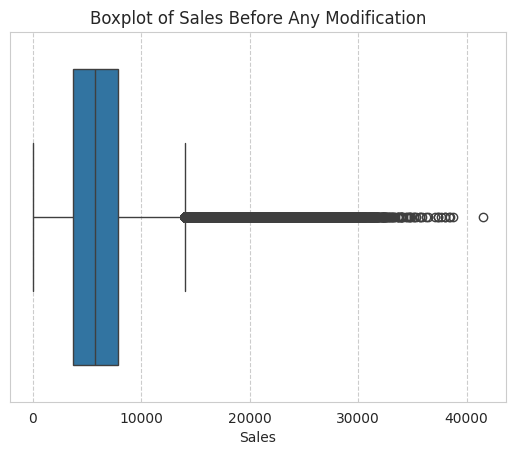

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for 'Sales' before any modification
sns.boxplot(x='Sales', data=total_df)
plt.title('Boxplot of Sales Before Any Modification')
plt.xlabel('Sales')
plt.show()


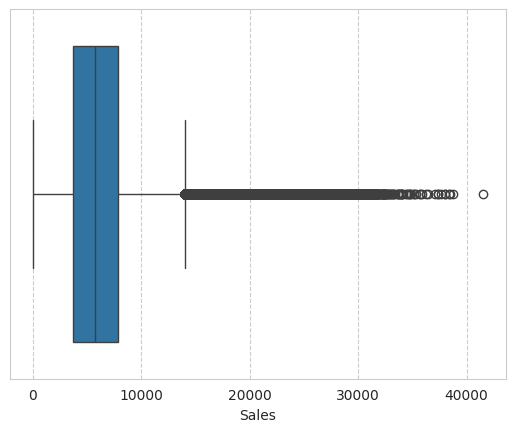

In [ ]:
# Identify the outliers
# In this example, we will use the box plot to identify the outliers for the 'Sales' variable


sns.boxplot(x='Sales', data=total_df)

# Decide on the outlier treatment strategy
# In this example, we will winsorize the outliers for the 'Sales' variable

from scipy.stats.mstats import winsorize

total_df['Sales'] = winsorize(total_df['Sales'], limits=[0.05, 0.05])

# Alternatively, you can remove the outliers for the 'Sales' variable

q1 = total_df['Sales'].quantile(0.25)
q3 = total_df['Sales'].quantile(0.75)
iqr = q3 - q1

df = total_df[(total_df['Sales'] >= q1 - 1.5*iqr) & (total_df['Sales'] <= q3 + 1.5*iqr)]


##### What all outlier treatment techniques have you used and why did you use those techniques?

Handling outliers is another important step in feature engineering and data pre-processing for the Rossmann sales prediction project. Outliers are data points that are significantly different from the other data points in the dataset and can have a significant impact on the predictive model.

Here are some steps for handling outliers and performing outlier treatments in the feature engineering and data pre-processing of data.

1. Identify the outliers: The first step is to identify the outliers in the dataset. You can use visualization tools such as box plots, scatter plots, or histograms to identify the outliers.

2. Decide on the outlier treatment strategy: There are several strategies for treating outliers, such as removing the outliers, winsorizing the outliers, or transforming the variables using logarithmic or square root transformations.

3. Implement the outlier treatment strategy: Once you have decided on the outlier treatment strategy, you can use Python libraries such as numpy, scipy, or sklearn to implement the outlier treatment.

In the above example, we first loaded the dataset and used a box plot to identify the outliers for the 'Sales' variable. We then decided to winsorize the outliers for the 'Sales' variable using the winsorize() function from the scipy.stats.mstats module. We also showed an alternative method of removing the outliers using the interquartile range (IQR) method.

It's important to note that outlier treatment should be performed with caution, as removing or transforming the outliers can also impact the predictive power of the model. It's always a good practice to explore and understand the nature of the outliers and the impact of the outlier treatment on the overall model performance.

### 3. Categorical Encoding

In [ ]:
# One-Hot Encoding
# In this example, we will one-hot encode the 'StateHoliday' column

df = pd.get_dummies(total_df, columns=['StateHoliday'])

# Alternatively, you can use the LabelEncoder from scikit-learn to perform label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['StateHoliday'] = le.fit_transform(total_df['StateHoliday'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Encoding categorical columns is an important step in feature engineering and data pre-processing for the data. Categorical columns contain values that are not numerical and cannot be used directly in predictive models. Therefore, we need to convert these categorical variables into numerical variables using encoding techniques.

Here are some common encoding techniques used for categorical variables:

1. Label Encoding: This is a simple technique where each category is assigned a unique numerical label. However, this technique can be problematic when the categories have no inherent order, as the numerical labels can introduce an unintended order to the categories.

2. One-Hot Encoding: This technique creates a binary column for each category, indicating whether or not a data point belongs to that category. This technique is useful when the categories have no inherent order and when the number of categories is not too large.

3. Binary Encoding: This technique creates binary codes for each category, where each digit represents a power of 2. This technique is useful when the number of categories is large.

In the above code, we loaded the dataset and used one-hot encoding to convert the 'StateHoliday' column into numerical columns using the get_dummies() function from the pandas module. We also showed an alternative method of label encoding using the LabelEncoder from the sklearn.preprocessing module.

It's important to note that the encoding technique used should depend on the nature of the categorical variable and the specific requirements of the predictive model. It's always a good practice to explore and understand the nature of the categorical variables and the impact of the encoding technique on the overall model performance.

### Multicollinearity

In [ ]:
# Import the necessary library for calculating Variance Inflation Factor (VIF).
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Define a function named 'calc_vif' that calculates the VIF for each column in the input DataFrame 'X'.
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# calculating the Variance Inflation Factor (VIF) for independent variables in the DataFrame total_df, excluding the 'Sales' column:


##calc_vif(total_df[[i for i in total_df.describe().columns if i not in ['Sales']]])

# Filter out non-numeric columns and the 'Sales' column
columns_to_include = [col for col in total_df.columns if col != 'Sales' and total_df[col].dtype in ['int64', 'float64']]

# Create a new dataframe containing only the selected columns
selected_df = total_df[columns_to_include]

# Calculate VIF
calc_vif(selected_df)

,variables,VIF
0,Store,3.673194e+00
1,DayOfWeek,3.717254e+00
2,Customers,5.210378e+00
3,Open,9.128893e+00
4,Promo,1.915190e+00
5,StateHoliday,1.172595e+00
6,SchoolHoliday,1.310959e+00
7,StoreType,1.938219e+00
8,Assortment,2.041350e+00
9,CompetitionDistance,1.590496e+00


In above table we can see that VIF(Variance Inflation Factor) value for column Promo2 and Promo2SinceYear is Higher .So we will drop either Promo2 or Promo2SinceYear and again check VIF value.Here we drop Promo2 column.

In [ ]:
#we drop Promo2 column.
calc_vif(total_df[[i for i in total_df.describe().columns if i not in ['Sales','Promo2']]])

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

VIF factor below 10 is look good for Machine Learning Model.

### Analysis of Target Variable i.e 'Sales'----(data cleaning/removing zero sales).

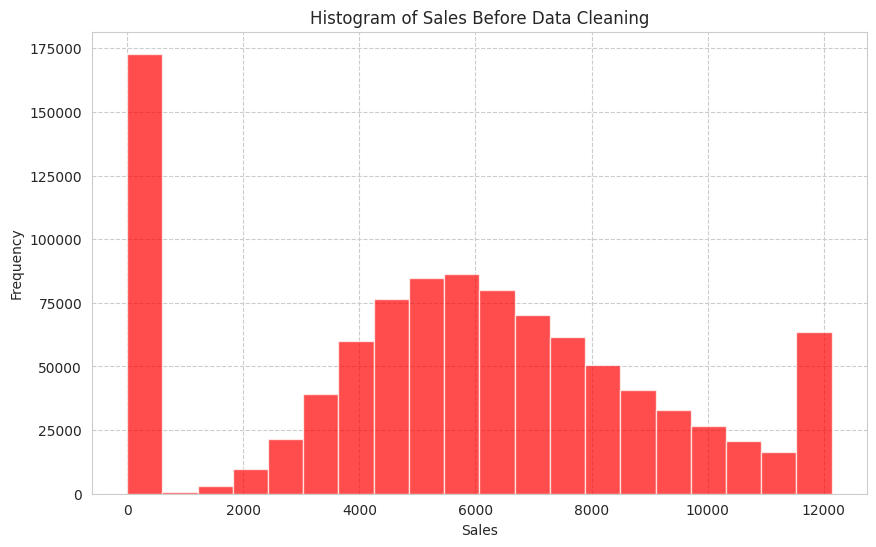

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming total_df is your DataFrame containing the 'Sales' column
# Create a histogram of the 'Sales' column from the DataFrame 'total_df'
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visualization
plt.hist(total_df['Sales'], bins=20, color="red", alpha=0.7)  # Increase the number of bins for better granularity
plt.title('Histogram of Sales Before Data Cleaning')  # Add a descriptive title
plt.xlabel('Sales')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.grid(True)  # Add gridlines for better readability
plt.show()


In [ ]:
total_df[(total_df.Open == 0) & (total_df.Sales == 0)].count()[0]

172817

So we will drop thoose store which sales is 0 assuming that the stores were closed temoprarily and this will help to train the model more accurately.

In [ ]:
# Filtering and dropping rows where both 'Open' and 'Sales' are 0
new_df = total_df.drop(total_df[(total_df.Open == 0) & (total_df.Sales == 0)].index)

In [ ]:
new_df.shape

(844392, 18)

In [ ]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,0
3,4,5,2015-07-31,12137,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,0,150,1,2006,0,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,1,860,1,1999,0,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,1,840,1,0,1,48,2012,0
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,1,1430,1,0,0,0,0,0


In new_df dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).

In [ ]:
# Perform one-hot encoding on the 'PromoInterval' column of the DataFrame 'new_df'
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])

In [ ]:

new_df


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,True
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,True
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,True
3,4,5,2015-07-31,12137,1498,1,1,0,1,2,2,620,7,2009,0,0,0,True
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,0,150,1,2006,0,0,0,True
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,1,860,1,1999,0,0,0,True
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,1,840,1,0,1,48,2012,True
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,1,1430,1,0,0,0,0,True


In [ ]:
new_df.to_csv('cleandata.csv', index=False)

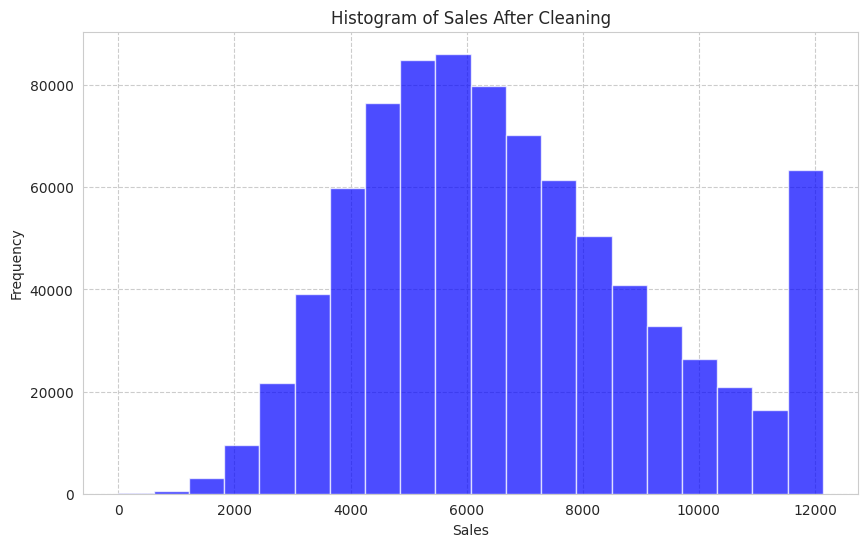

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust the figure size for better visualization
new_df['Sales'].hist(bins=20, color='blue', alpha=0.7)  # Increase the number of bins for better granularity
plt.title('Histogram of Sales After Cleaning')  # Add a descriptive title
plt.xlabel('Sales')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.grid(True)  # Add gridlines for better readability
plt.show()


# ***ML Algorithm Implementation***

In [ ]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report


### ML Model - 1 (excluding rows which has sales =0)

As we have two dataset,first one having sales = '0' rows and another exculding it. We will both the data and find the best model.

First We will take dataset excluding Sales = '0' rows.

In [ ]:
# defining dependent variable
dependent_variables = 'Sales'

# defining independent variable
independent_variables = list(new_df.columns.drop(['Promo2SinceYear','Date','Sales']))
#List of Independent Variable
independent_variables
# Create the data of independent variables
X = new_df[independent_variables].values

# Create the data of dependent variable
y = new_df[dependent_variables].values
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
# Here we Train the model
reg = LinearRegression().fit(X_train, y_train)
#Checking the Regression Score i.e R-squared value
reg.score(X_train, y_train)
# Checking the cofficient of different independent columns
reg.coef_
# Checking the intercept of different indpendent columns
reg.intercept_
#Predicting Dependent Variable With Test Dataset i.e 20%
y_pred = reg.predict(X_test)
y_pred
# Original Test Dependent Value
y_test
#Predicting on Train Dataset
y_pred_train = reg.predict(X_train)
y_pred_train

# Dependent Variable With Train Dataset i.e 80 %
y_train
#Calculate MSE & RMSE for Test Prediction
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
# calculate the R-squared score between the true target values (y_test) and the predicted values
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
# true target values (y_test) and the corresponding predicted values (y_pred) side by side.
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'pred'])

(675513, 15)
(168879, 15)
MSE : 2085179.6193681236
RMSE : 1444.0151035803342
R2 : 0.6803900016113832


,actual,pred
0,5495,5503.999667
1,5472,5279.595886
2,7969,6815.052113
3,7384,6037.401976
4,12137,7324.693659
...,...,...
168874,12137,13968.110355
168875,9195,6663.910859
168876,2938,4441.800987
168877,10413,7627.556109


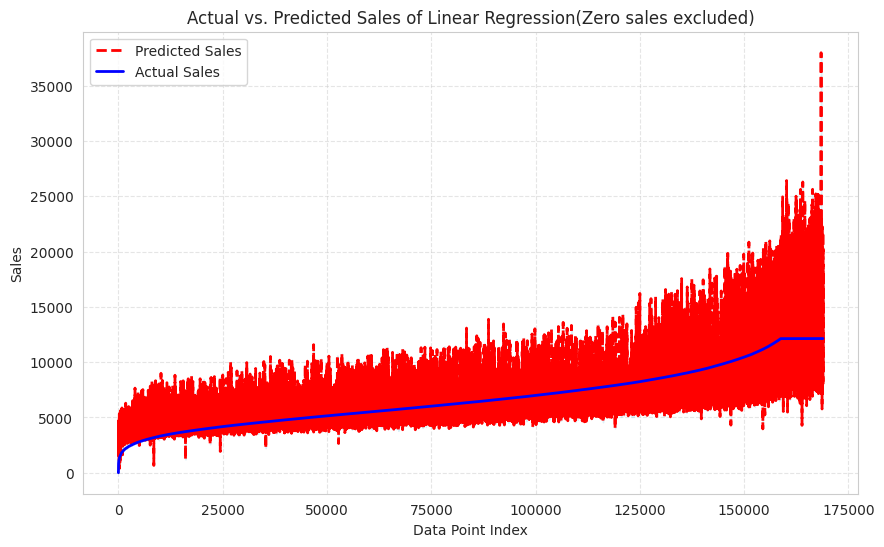

In [ ]:
import matplotlib.pyplot as plt

# Sort the predicted sales values based on the actual sales values for better visualization
sorted_indices = y_test.argsort()

# Create a line plot of predicted sales values
plt.figure(figsize=(10, 6))
plt.plot(y_pred[sorted_indices], label='Predicted Sales', linestyle='--', color='red', linewidth=2)

# Create a line plot of actual sales values (overlapping the predicted sales values)
plt.plot(y_test[sorted_indices], label='Actual Sales', color='blue', linewidth=2)

# Fill the area between the two lines
plt.fill_between(range(len(y_test)), y_pred[sorted_indices], y_test[sorted_indices], color='skyblue', alpha=0.3)

plt.title('Actual vs. Predicted Sales of Linear Regression(Zero sales excluded)')
plt.xlabel('Data Point Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # add grid lines
plt.show()


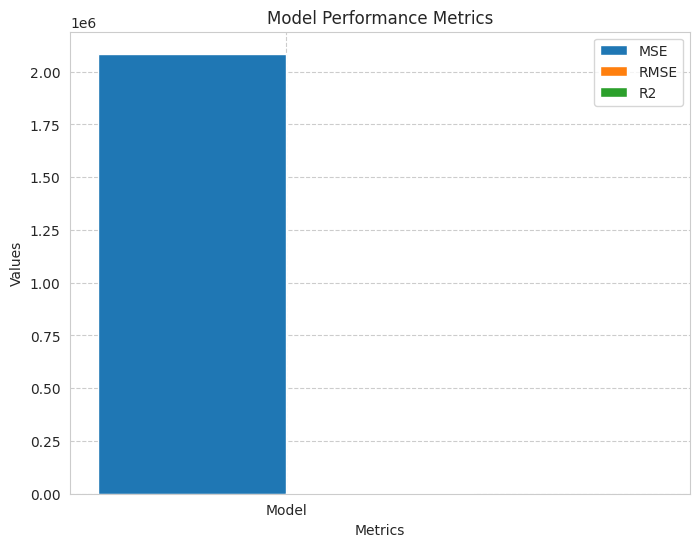

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming your code is executed up to this point

# Evaluate the model and obtain performance metrics
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_pred)

# Store the performance metrics in a dictionary
model_metrics = {
    'Model': {'MSE': MSE, 'RMSE': RMSE, 'R2': r2}
}

# Extract the metrics and labels for plotting
models = list(model_metrics.keys())
metrics = list(model_metrics['Model'].keys())
values = [model_metrics['Model'][metric] for metric in metrics]

# Create a grouped bar chart
bar_width = 0.2
index = np.arange(len(models))

plt.figure(figsize=(8, 6))

for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, [model_metrics['Model'][metric] for _ in models], bar_width, label=metric)

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Performance Metrics')
plt.xticks(index + 0.5 * bar_width, models)
plt.legend()

plt.show()


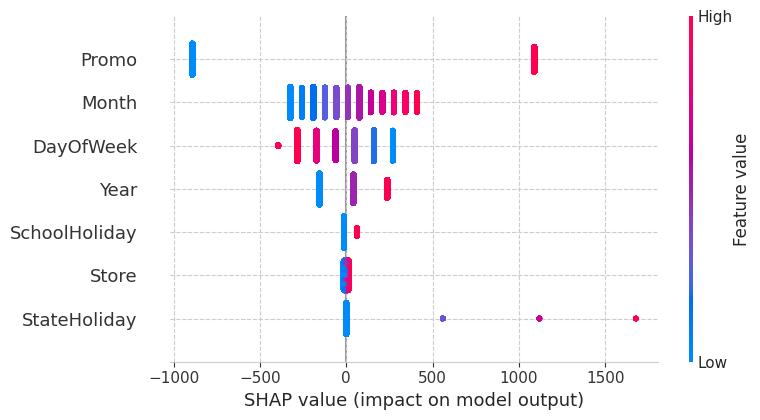

[('2013.00 < Year <= 2014.00', 244437.10935658947), ('StateHoliday <= 0.00', 27410.475996846344), ('Store <= 281.00', -8719.118198763961), ('SchoolHoliday <= 0.00', 3776.950939916683)]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular

# load the Rossman dataset
data = pd.read_csv("/content/cleandata.csv", low_memory=False)

# convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# extract year, month, and day of week from 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

# select relevant features
features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month']

# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data['Sales'], test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()

# train the model on the training set
model.fit(X_train, y_train)

# create a SHAP explainer object
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")  # Corrected parameter name

# calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# plot the SHAP values for the first feature of the first test instance
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Sales'], mode='regression')

# explain the prediction for the first test instance using LIME
exp = explainer.explain_instance(X_test.values[0], model.predict, num_features=4)

# print the LIME explanation
print(exp.as_list())


### LASSO

In [ ]:
#import the cross_val_score function from scikit-learn and creates a Lasso regression model with specific hyperparameters.
from sklearn.model_selection import cross_val_score
L1 = Lasso(alpha = 0.4, max_iter=10000,selection='cyclic', tol=0.0001,)
L1.fit(X_train, y_train)
# fits the Lasso regression model L1 to the training data X_train and the corresponding target values y_train.
y_pred_lasso = L1.predict(X_test)
#trained Lasso regression model L1 to make predictions on the test data X_test and stores the predicted values in y_pred_lasso.
L1.score(X_test, y_test) #calculates the R-squared score of the Lasso regression model (L1) on the test data and target values (X_test, y_test).
# providing an estimate of its generalization ability.
cv_scores = cross_val_score(L1, X, y, cv=10)
mean_cv_score = cv_scores.mean()
cv_scores
mean_cv_score
from sklearn.model_selection import GridSearchCV, cross_val_score
# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
lasso_cv = GridSearchCV(L1, parameters, cv=5)
lasso_cv.fit(X, y)
# extract the best alpha value and corresponding score
best_alpha_lasso = lasso_cv.best_params_['alpha']
best_score_lasso= lasso_cv.best_score_
best_alpha_lasso
best_score_lasso
pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,5203,5766.416132
1,8590,7565.362524
2,6465,6259.744635
3,7250,6127.203704
4,4339,5918.870642
...,...,...
168874,10096,7987.224693
168875,12137,7725.517823
168876,7499,5316.663764
168877,11606,7649.461405


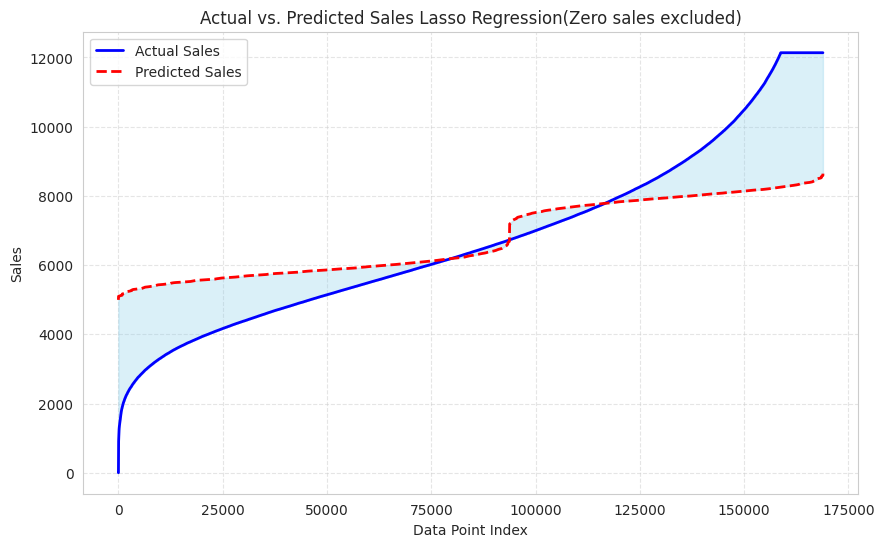

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a line plot of actual vs. predicted sales values for Lasso Regression
plt.figure(figsize=(10, 6))
plt.plot(np.sort(y_test), label='Actual Sales', color='blue', linewidth=2)
plt.plot(np.sort(y_pred_lasso), label='Predicted Sales', linestyle='--', color='red', linewidth=2)
plt.fill_between(np.arange(len(y_test)), np.sort(y_test), np.sort(y_pred_lasso), color='skyblue', alpha=0.3)
plt.title('Actual vs. Predicted Sales Lasso Regression(Zero sales excluded)')
plt.xlabel('Data Point Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # add grid lines
plt.show()


In [ ]:
L2 = Ridge(alpha = 0.5)
#train the Ridge model using the provided training data to learn the relationship between the features (X_train) and the target variable (y_train).
L2.fit(X_train, y_train)
#predictions on the test data
L2.predict(X_test)
# score of the Ridge regression model
L2.score(X_test, y_test)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score

ridge = Ridge(max_iter=10000, solver='auto')

# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
ridge_cv = GridSearchCV(L2, parameters, cv=5)
ridge_cv.fit(X, y)

# extract the best alpha value and corresponding score
best_alpha = ridge_cv.best_params_['alpha']
best_score = ridge_cv.best_score_

# perform cross-validation with the best alpha value
ridge_best = Ridge(alpha=best_alpha, max_iter=10000, solver='auto')
cv_scores = cross_val_score(ridge_best, X, y, cv=5)

# find the maximum score and corresponding alpha value
max_score = cv_scores.max()
max_alpha = best_alpha

print("Best alpha value: ", best_alpha)
print("Best score: ", best_score)
print("Maximum CV score: ", max_score)
print("Corresponding alpha value: ", max_alpha)

Best alpha value:  0.5
Best score:  0.6737045958056898
Maximum CV score:  0.6867433822173206
Corresponding alpha value:  0.5


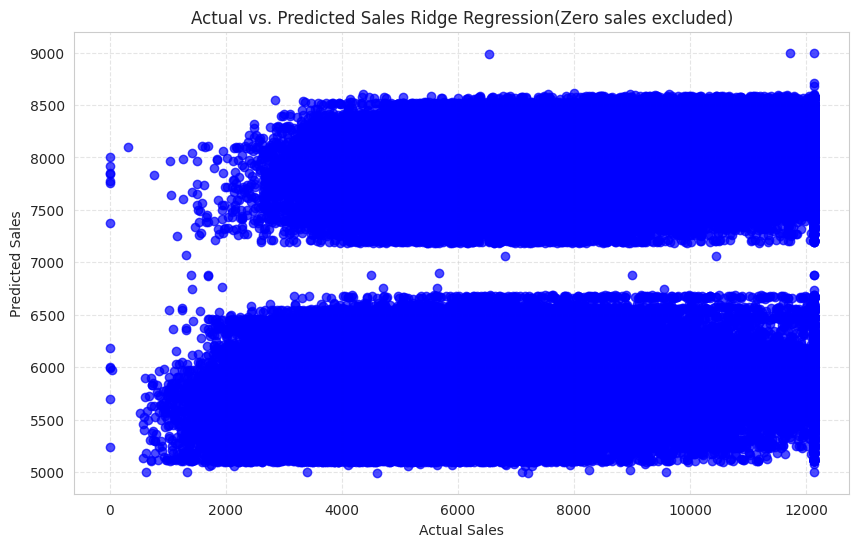

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predictions on the test data
y_pred_ridge = L2.predict(X_test)

# Create a scatter plot of actual vs. predicted sales values for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.7)
plt.title('Actual vs. Predicted Sales Ridge Regression(Zero sales excluded)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True, linestyle='--', alpha=0.5)  # add grid lines
plt.show()



### **Elastic Net**

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# define the Elastic Net model
elastic_net = ElasticNet(max_iter=10000)

# define the range of alpha and l1_ratio values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

# perform grid search to find the best alpha and l1_ratio values
elastic_net_cv = GridSearchCV(elastic_net, parameters, cv=5)
elastic_net_cv.fit(X_train, y_train)

# extract the best alpha and l1_ratio values and corresponding score
best_alpha = elastic_net_cv.best_params_['alpha']
best_l1_ratio = elastic_net_cv.best_params_['l1_ratio']
best_score = elastic_net_cv.best_score_

# create an Elastic Net model with the best hyperparameters
elastic_net_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000)
elastic_net_best.fit(X_train, y_train)

# evaluate the model on the testing set
test_score = elastic_net_best.score(X_test, y_test)

print("Best alpha value: ", best_alpha)
print("Best l1_ratio value: ", best_l1_ratio)
print("Best score: ", best_score)
print("Test score: ", test_score)


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predictions on the test data
y_pred_elastic_net = elastic_net_best.predict(X_test)

# Sort the predicted and actual sales values based on ascending order of actual sales
sorted_indices_elastic_net = np.argsort(y_test)

# Create a line plot of actual vs. predicted sales values for Elastic Net Regression
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_pred_elastic_net[sorted_indices_elastic_net], label='Predicted Sales', linestyle='--', color='red', linewidth=2)
plt.plot(np.arange(len(y_test)), y_test[sorted_indices_elastic_net], label='Actual Sales', color='blue', linewidth=2)
plt.fill_between(np.arange(len(y_test)), y_test[sorted_indices_elastic_net], y_pred_elastic_net[sorted_indices_elastic_net], color='skyblue', alpha=0.3)
plt.title('Actual vs. Predicted Sales Elastic Net Regression(Zero sales excluded)')
plt.xlabel('Data Point')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # add grid lines
plt.show()


##***With whole Dataset***

**In total_df dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).**

In [ ]:
#    total_df = pd.get_dummies(total_df, columns=['PromoInterval'])

In [ ]:
total_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,0
3,4,5,2015-07-31,12137,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


We define dependent and independent variables and convert them into arrays

In [ ]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = total_df.columns.drop(['Store', 'Promo2SinceYear','Date','Sales'])

In [ ]:
indep_var

Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'PromoInterval'],
      dtype='object')

In [ ]:
# Create the data of independent variables
U = total_df[indep_var].values
# Create the dependent variable data
V = total_df[dep_var].values

In [ ]:
U

array([[  5, 555,   1, ...,   0,   0,   0],
       [  5, 625,   1, ...,   1,  13,   0],
       [  5, 821,   1, ...,   1,  14,   0],
       ...,
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   1,  22,   0]])

In [ ]:
V

masked_array(data=[5263, 6064, 8314, ...,    0,    0,    0],
             mask=False,
       fill_value=999999)

In [ ]:
total_df[indep_var]

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval
0,5,555,1,1,0,1,2,0,1270,7,2008,0,0,0
1,5,625,1,1,0,1,0,0,570,7,2007,1,13,0
2,5,821,1,1,0,1,0,0,14130,7,2006,1,14,0
3,5,1498,1,1,0,1,2,2,620,7,2009,0,0,0
4,5,559,1,1,0,1,0,0,29910,7,2015,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,0,0,1900,1,2014,1,31,0
1017205,2,0,0,0,1,1,2,2,1880,1,2006,0,0,0
1017206,2,0,0,0,1,1,0,2,9260,1,0,0,0,0
1017207,2,0,0,0,1,1,0,2,870,1,0,0,0,0


In [ ]:

# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, V, test_size=0.2, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(813767, 14)
(203442, 14)


### **LINEAR REGRESSION**

In [ ]:
# scling the x values
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)
# fitting the data into Lineat Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)
# Use the trained linear regression model to make predictions on the test dataset 'U_test'.
v_pred=linear_regression.predict(U_test)
v_pred
# Calculate the R-squared score of the linear regression model on the training data.
# The R-squared score is a statistical measure that represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features).
# It ranges from 0 to 1, where 1 indicates a perfect fit of the model to the data.

linear_regression.score(U_train, v_train)
# Create a DataFrame named 'regression_Dataframe' to store the actual and predicted values side by side.
# The 'zip()' function is used to combine 'v_test' and 'v_pred' into pairs, and then the 'pd.DataFrame()' function creates the DataFrame.
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe
sales_mean=total_df[dependent_variables].mean()
sales_mean

sales_mean_new=new_df[dependent_variables].mean()
sales_mean_new
# calculate and print the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 1786216.5677090154
RMSE : 1336.4941330619508
RMPSE : 0.2377787853934278
R2 : 0.8494363080112406


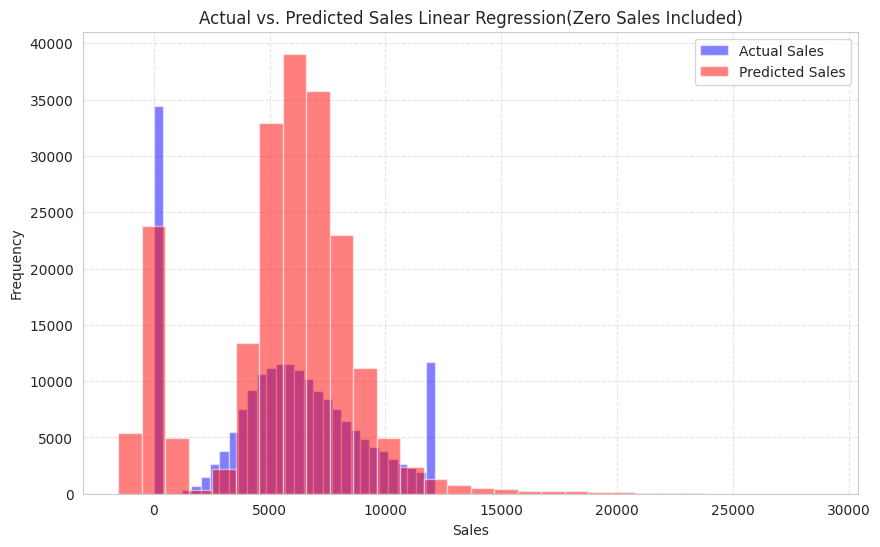

In [ ]:
import matplotlib.pyplot as plt

# Plotting histograms of actual and predicted sales
plt.figure(figsize=(10, 6))
plt.hist(v_test, bins=30, alpha=0.5, color='blue', label='Actual Sales')
plt.hist(v_pred, bins=30, alpha=0.5, color='red', label='Predicted Sales')
plt.title('Actual vs. Predicted Sales Linear Regression(Zero Sales Included)')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # add grid lines
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(U_train)

# Initialize the Linear Regression model
linear_regression = LinearRegression()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(linear_regression, X_scaled, v_train, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
print("Mean R2 Score:", np.mean(cv_scores))
print("Standard Deviation of R2 Scores:", np.std(cv_scores))


Cross-Validation Scores: [0.84841608 0.84787275 0.84956725 0.84747005 0.84796662]
Mean R2 Score: 0.8482585499103573
Standard Deviation of R2 Scores: 0.0007201806200798383


### **DECISION TREE**

In [ ]:
#Decision Tree regression model to predict the target variable
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)
v_pred_dt = decision_tree.predict(U_test)
v_train_dt = decision_tree.predict(U_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)
decisiontree_Dataframe = pd.DataFrame(zip(v_test, v_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe
# creating a DataFrame containing the true target values (v_test) and the corresponding predicted values (v_pred_dt) side by side.

MSE : 1245415.4342993165
RMSE : 1115.9818252549262
RMPSE : 0.1985469268932113
R2 : 0.895021494460555


,actual,pred
0,7285,7291.119403
1,6221,11006.721841
2,8132,9216.140395
3,12137,10569.835143
4,5472,6752.551826
...,...,...
203437,5650,6752.551826
203438,5464,4946.920201
203439,6191,7039.972741
203440,5663,5710.508058


In [ ]:
# Importing necessary libraries
from sklearn.model_selection import cross_val_score

# Decision Tree regression model
decision_tree = DecisionTreeRegressor(max_depth=5)

# Performing cross-validation
cross_val_scores = cross_val_score(decision_tree, U_train, v_train, cv=5)

# Printing cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean R2 Score:", cross_val_scores.mean())
print("Standard Deviation of R2 Scores:", cross_val_scores.std())


Cross-Validation Scores: [0.89484837 0.89586555 0.89437863 0.89563202 0.89421168]
Mean R2 Score: 0.8949872499324514
Standard Deviation of R2 Scores: 0.0006600539191308231


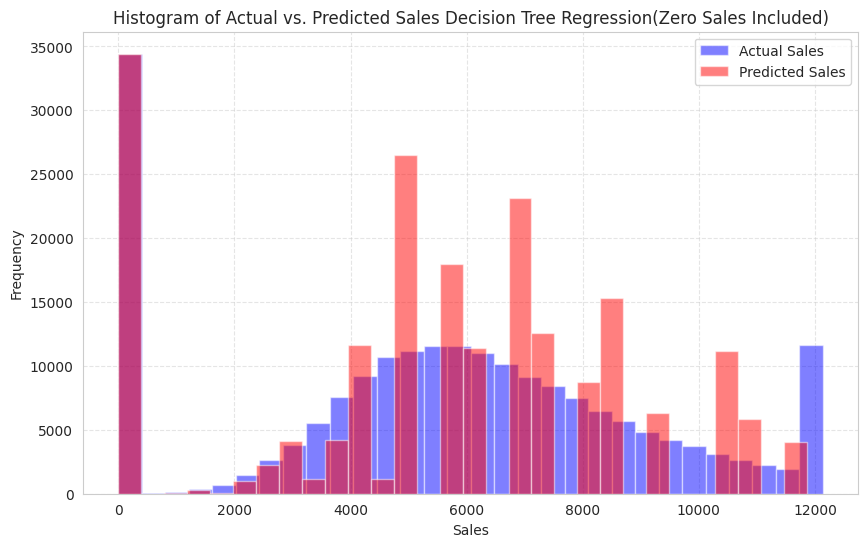

In [ ]:
import matplotlib.pyplot as plt

# Plotting histograms of actual and predicted sales
plt.figure(figsize=(10, 6))
plt.hist(v_test, bins=30, alpha=0.5, color='blue', label='Actual Sales')
plt.hist(v_pred_dt, bins=30, alpha=0.5, color='red', label='Predicted Sales')
plt.title('Histogram of Actual vs. Predicted Sales Decision Tree Regression(Zero Sales Included)')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # add grid lines
plt.show()


In [ ]:
# Assuming you have already calculated the RMSE and stored it in the variable RMSE
# Assuming you have already calculated the mean of the target variable and stored it in the variable sales_mean

# Calculate Normalized RMSE (NRMSE)
NRMSE = (RMSE / sales_mean) * 100
print("Normalized RMSE:", NRMSE)


In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a random forest regressor with n_estimators=500, max_depth=8, and n_jobs=2
random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)

# Fit the random forest to the training data
random_forest.fit(U_train, v_train)

# Make predictions on the test data
v_pred_rf = random_forest.predict(U_test)

# Calculate the mean squared error (MSE) between the predicted and actual values
MSE = mean_squared_error(v_test, v_pred_rf)
print("MSE:", MSE)

# Calculate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate the root mean squared percentage error (RMPSE)
sales_mean = np.mean(v_test)
RMPSE = RMSE / sales_mean
print("RMPSE:", RMPSE)

# Calculate the coefficient of determination (R2 score)
r2 = r2_score(v_test, v_pred_rf)
print("R2:", r2)

#new
# Assuming you have already calculated the RMSE and stored it in the variable RMSE
# Assuming you have already calculated the mean of the target variable and stored it in the variable sales_mean

# Calculate Normalized RMSE (NRMSE)
NRMSE = (RMSE / sales_mean) * 100
print("Normalized RMSE:", NRMSE)


MSE: 819278.7117013856
RMSE: 905.1401613570052
RMPSE: 0.16088317717199366
R2: 0.930941393204203
Normalized RMSE: 16.088317717199367


In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming 'random_forest' is your trained Random Forest model
# Assuming 'U_train' and 'v_train' are your training features and target

# Perform cross-validation with 5 folds
cross_val_scores = cross_val_score(random_forest, U_train, v_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean R2 score
mean_r2_score = cross_val_scores.mean()
print("Mean R2 Score:", mean_r2_score)

# Calculate the standard deviation of R2 scores
std_r2_score = cross_val_scores.std()
print("Standard Deviation of R2 Scores:", std_r2_score)


In [ ]:
import matplotlib.pyplot as plt

# Plotting histograms of actual and predicted sales
plt.figure(figsize=(10, 6))
plt.hist(v_test, bins=30, alpha=0.5, color='blue', label='Actual Sales')
plt.hist(v_pred_rf, bins=30, alpha=0.5, color='red', label='Predicted Sales')
plt.title('Histogram of Actual vs. Predicted Sales Random Forest Regression(Zero Sales Included)')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # add grid lines
plt.show()


In [ ]:
# importing library of AdaboostRegressor
from sklearn.ensemble import AdaBoostRegressor
## using an AdaBoost regression model to predict the target variable (v_pred_ada) based on the features (U_test) and evaluates its performance
adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01)
adaboost.fit(U_train, v_train)
v_pred_ada = adaboost.predict(U_test)
# mean squared error
MSE = mean_squared_error(v_test, v_pred_ada)
print("MSE :", MSE)
#Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)
#Relative RMSE (RMPSE)
RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)
#R-squared (R2) score
r2 = r2_score(v_test, v_pred_ada)
print("R2 :", r2)

# Assuming you have already calculated the RMSE and stored it in the variable RMSE
# Assuming you have already calculated the mean of the target variable and stored it in the variable sales_mean

# Calculate Normalized RMSE (NRMSE)
NRMSE = (RMSE / sales_mean) * 100
print("Normalized RMSE:", NRMSE)


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Plotting histograms of actual and predicted sales
plt.figure(figsize=(10, 6))
plt.hist(v_test, bins=30, alpha=0.5, color='blue', label='Actual Sales')
plt.hist(v_pred_ada, bins=30, alpha=0.5, color='red', label='Predicted Sales')
plt.title('Histogram of Actual vs. Predicted Sales AdaBoost Regression(Zero Sales Included)')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # add grid lines
plt.show()


In [ ]:
# importing xgboost as xgb
import xgboost as xgb
# XGBoost regression model to predict the target variable
xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost.fit(U_train, v_train)
v_pred_xgb = xgboost.predict(U_test)
# Mean Squared Error (MSE)
MSE = mean_squared_error(v_test, v_pred_xgb)
print("MSE :", MSE)
# Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)
#Relative RMSE (RMPSE)
RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)
#R-squared (R2) score.
r2 = r2_score(v_test, v_pred_xgb)
print("R2 :", r2)

# Assuming you have already calculated the RMSE and stored it in the variable RMSE
# Assuming you have already calculated the mean of the target variable and stored it in the variable sales_mean

# Calculate Normalized RMSE (NRMSE)
NRMSE = (RMSE / sales_mean) * 100
print("Normalized RMSE:", NRMSE)


MSE : 127636.18613883598
RMSE : 357.2620692696553
RMPSE : 0.0635613272042277
R2 : 0.9892412959526651
Normalized RMSE: 6.356132720422771


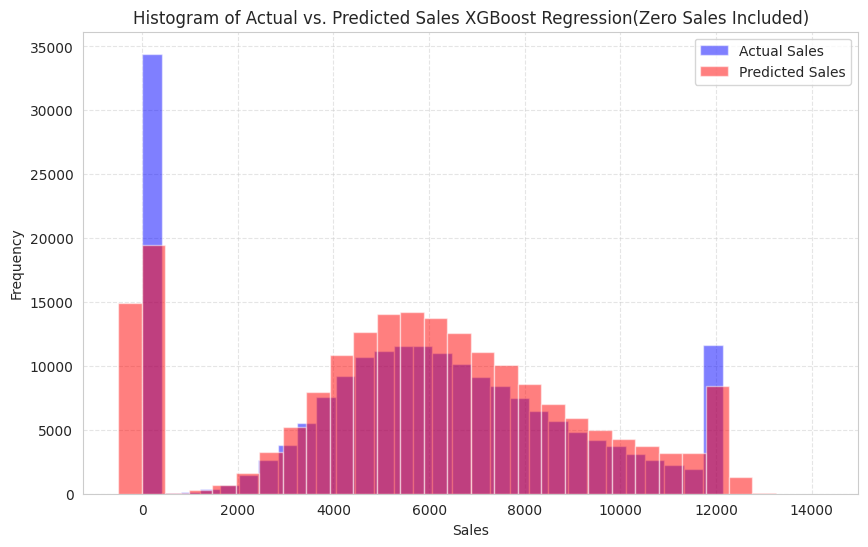

In [ ]:
import matplotlib.pyplot as plt

# Plotting histograms of actual and predicted sales
plt.figure(figsize=(10, 6))
plt.hist(v_test, bins=30, alpha=0.5, color='blue', label='Actual Sales')
plt.hist(v_pred_xgb, bins=30, alpha=0.5, color='red', label='Predicted Sales')
plt.title('Histogram of Actual vs. Predicted Sales XGBoost Regression(Zero Sales Included)')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # add grid lines
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your time series data loaded into a pandas DataFrame
# U_train, v_train, U_test, v_test are assumed to be the training and testing sets

# Fit SARIMA model
sarima_model = sm.tsa.SARIMAX(v_train, order=(5,1,0), seasonal_order=(1, 1, 1, 12))
# Example order (p,d,q), seasonal_order (P,D,Q,s), you may need to tune these values
sarima_results = sarima_model.fit()

# Forecast
sarima_forecast = sarima_results.predict(start=len(v_train), end=len(v_train)+len(v_test)-1, dynamic=False)

# Calculate metrics
MSE_sarima = mean_squared_error(v_test, sarima_forecast)
print("MSE (SARIMA):", MSE_sarima)

RMSE_sarima = np.sqrt(MSE_sarima)
print("RMSE (SARIMA):", RMSE_sarima)

R2_sarima = r2_score(v_test, sarima_forecast)
print("R2 (SARIMA):", R2_sarima)


KeyboardInterrupt: 

* **Sales with Zero Sales**:
  * The `Sales` column contained **172,817** rows with zero sales.
  * Created a new dataframe by removing rows with zero sales and trained the model.
  * Achieved an accuracy score of approximately **74%** with various algorithms.

* **Full Dataset**:
  * Trained another model using the complete dataset (including rows with zero sales).
  * Achieved an accuracy score of about **98%**, significantly better than the previous model.

* **Conclusion**:
  * Removing rows with zero sales excluded valuable information due to the large number of such rows (**172,817**).
  * Decided to retain all data.
  * Best performance was obtained with:
    * **Random Forest model**
    * Gradient boosting techniques like AdaBoost and XGBoost
  * Optimized parameters to avoid overfitting and improve model performance.


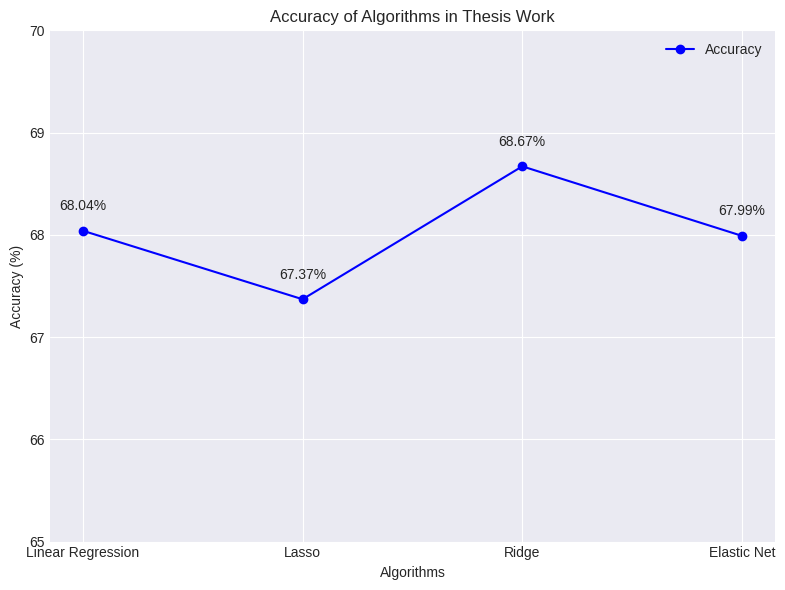

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ['Linear Regression', 'Lasso', 'Ridge', 'Elastic Net']

# Corresponding accuracy values
accuracy_values = [ 68.04, 67.37, 68.67, 67.99]

# Plotting the line graph
plt.figure(figsize=(8, 6))
plt.plot(algorithms, accuracy_values, marker='o', linestyle='-', color='b', label='Accuracy')

# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Algorithms in Thesis Work')
plt.ylim(65, 70)  # You can adjust the y-axis limits for better visualization

# Adding data labels
for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.2, f'{value:.2f}%', ha='center')

# Displaying legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-7-b668659a5d62>:29: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


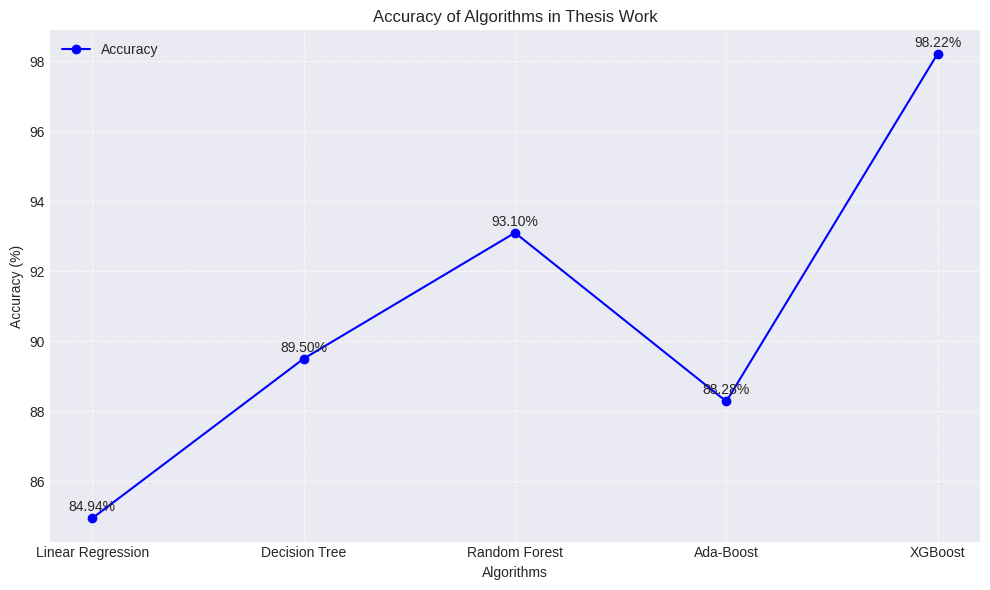

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Ada-Boost', 'XGBoost']

# Corresponding accuracy values
accuracy_values = [84.94, 89.50, 93.10, 88.28, 98.22]

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(algorithms, accuracy_values, marker='o', linestyle='-', color='b', label='Accuracy')

# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Algorithms in Thesis Work')

# Adding data labels
for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.2, f'{value:.2f}%', ha='center')

# Displaying legend
plt.legend()

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a background style
plt.style.use('seaborn-darkgrid')

# Displaying the plot
plt.tight_layout()
plt.show()
